
<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

## ***Proyek Akhir - RES***
#### **Kelompok YukBisaYuk**
2006531951 - Andi Afifah Khairunnisa

2006532903 - Muhammad Damar Kusumo

2006533811 - Sultan Fahrezy Syahdwinata

2006596314 - Ekky Aliansyah

---

## Import Library

In [1]:
!pip install imblearn

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from numpy import where

from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, silhouette_samples, silhouette_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB, ComplementNB, BernoulliNB
from sklearn.datasets import make_classification

from collections import Counter

from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import NearMiss

## Functions

In [3]:
def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

In [4]:
def show_distribution(df):
    plt.figure(figsize=(15, 20))
    for i in range(len(pd.DataFrame(df).columns)):
        plt.subplot(11, 2, i+1)
        sns.kdeplot(df[pd.DataFrame(df).columns[i]], shade=True)
        plt.tight_layout()

In [5]:
def countplot(column):
    return sns.countplot(x= column, data=df)

In [6]:
def metrics_reg(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, y_pred)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [7]:
def outlier_handling(column, df):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    median = df.loc[(df[column] >= lower_range) | (df[column] <= upper_range), column].median()
    df[column] = np.where((df[column] < lower_range) | (df[column] > upper_range), median, df[column])

In [8]:
def kdeplot(column):
    return sns.kdeplot(data=df, x=column)

In [9]:
# Fungsi untuk bagian Membuat Model nomor C
def show_plot(feature, i, title):
    df_filtered = clustered[clustered[feature] == i]
    ax = df_filtered.groupby(['cluster'], as_index=False)[feature].count().plot.pie(y=feature, figsize=(3, 6), autopct='%1.0f%%')
    ax.legend(title="Cluster",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1))
    ax.set_title(title + " " + i)


def show_plot_cluster(feature, i, title, attr):
    df_filtered = clustered[clustered[feature] == i]
    ax = df_filtered.groupby([attr], as_index=False)[feature].count().plot.pie(y=feature, figsize=(3, 6), autopct='%1.0f%%')
    ax.legend(title=attr,
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1))
    ax.set_title(title + " " + str(i))

## Import and Read Dataset

In [10]:
df = pd.read_csv('/work/employee_resign.csv')

display(df)

,age,resign,division,home_distance,education,employee_id,score_environment,major,gender,hourly_rate,...,rate_performance,score_work_relationahip,working_hours,time_total_working,last_year_training_time,score_work_life_balance,time_current_company,time_current_role,time_last_promotion,time_current_manager
0,41,Yes,Marketing,1,2,FT1310001,2,Life Sciences,Female,94,...,3,1,40,8,0,1,6,4,0,5
1,49,No,Health and Technology,8,1,FT1010002,3,Life Sciences,Male,61,...,4,4,40,10,3,3,10,7,1,7
2,37,Yes,Health and Technology,2,2,FT1110004,4,Other,Male,92,...,3,2,40,7,3,3,0,0,0,0
3,33,No,Health and Technology,3,4,FT1110005,4,Life Sciences,Female,56,...,3,3,40,8,3,3,8,7,3,0
4,27,No,Health and Technology,2,1,FT1010007,1,Computer Science,Male,40,...,3,4,40,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Health and Technology,23,2,FT1312061,3,Computer Science,Male,41,...,3,3,40,17,3,3,5,2,0,3
1466,39,No,Health and Technology,6,1,FT1212062,4,Computer Science,Male,42,...,3,1,40,9,5,3,7,7,1,7
1467,27,No,Health and Technology,4,3,FT1112064,2,Life Sciences,Male,87,...,4,2,40,6,0,3,6,2,0,3
1468,49,No,Marketing,2,3,FT1212065,4,Computer Science,Male,63,...,3,4,40,17,3,2,9,6,0,8


## Data Understanding

### Describing Dataset

In [11]:
df.info()
total_rows, total_attributes = df.shape
print()
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   age                          1470 non-null   int64 
 1   resign                       1470 non-null   object
 2   division                     1470 non-null   object
 3   home_distance                1470 non-null   int64 
 4   education                    1470 non-null   int64 
 5   employee_id                  1470 non-null   object
 6   score_environment            1470 non-null   int64 
 7   major                        1470 non-null   object
 8   gender                       1470 non-null   object
 9   hourly_rate                  1470 non-null   int64 
 10  score_contribution           1470 non-null   int64 
 11  job_rank                     1470 non-null   int64 
 12  role                         1470 non-null   object
 13  score_job_satisfication      1470

In [12]:
total_rows, total_attributes = df.shape
print()
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)


Jumlah data: 1470
Jumlah atribut: 30


In [13]:
df.describe()

,age,home_distance,education,score_environment,hourly_rate,score_contribution,job_rank,score_job_satisfication,monthly_income,companies_count,...,rate_performance,score_work_relationahip,working_hours,time_total_working,last_year_training_time,score_work_life_balance,time_current_company,time_current_role,time_last_promotion,time_current_manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,2.693197,...,3.153741,2.712245,40.0,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,2.498009,...,0.360824,1.081209,0.0,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,3.000000,1.000000,40.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,...,3.000000,2.000000,40.0,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,...,3.000000,3.000000,40.0,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,4.000000,...,3.000000,4.000000,40.0,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,...,4.000000,4.000000,40.0,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
df.describe(include=['object'])

,resign,division,employee_id,major,gender,role,marriage_status,underage,over_time
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,1470,6,2,9,3,1,2
top,No,Health and Technology,FT1010151,Life Sciences,Male,Sales Executive,Married,No,No
freq,1233,961,1,606,882,326,673,1470,1054


### Describing Duplicate Data

In [15]:
stats = df.duplicated().to_frame("redundant")
red = stats[stats["redundant"] == True].count()
print("Jumlah data " + str(red))
stats[stats["redundant"] == True]

Jumlah data redundant    0
dtype: int64


,redundant


### Describing Outliers

In [16]:
# Variabel untuk outliers
Q3 = df.quantile(0.75)
Q1 = df.quantile(0.25)
IQR = Q3-Q1

In [17]:
Jumlah_Outlier0 = []

for col in df.select_dtypes(np.number).columns:
    outliers = ((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier0.append([col, outliers, outliers/len(df)])
    
indexOutput0 = list(range(0, len(Jumlah_Outlier0)))

pd.DataFrame(Jumlah_Outlier0, columns=['Column', 'Outlier','persentase'],index=indexOutput0).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,last_year_training_time,238,0.161905
1,rate_performance,226,0.153741
2,monthly_income,114,0.077551
3,time_last_promotion,107,0.072789
4,time_current_company,104,0.070748
5,time_total_working,63,0.042857
6,companies_count,52,0.035374
7,time_current_role,21,0.014286
8,time_current_manager,14,0.009524
9,score_work_relationahip,0,0.000000


In [18]:
cek_missing_values(df)

,Total,Percent


<AxesSubplot: xlabel='age', ylabel='Density'>

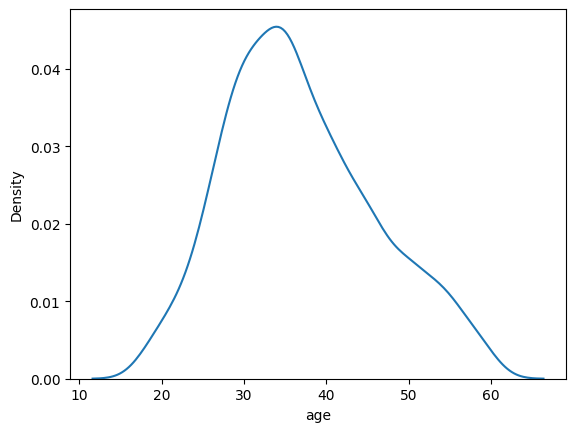

In [19]:
kdeplot('age')

<AxesSubplot: xlabel='resign', ylabel='count'>

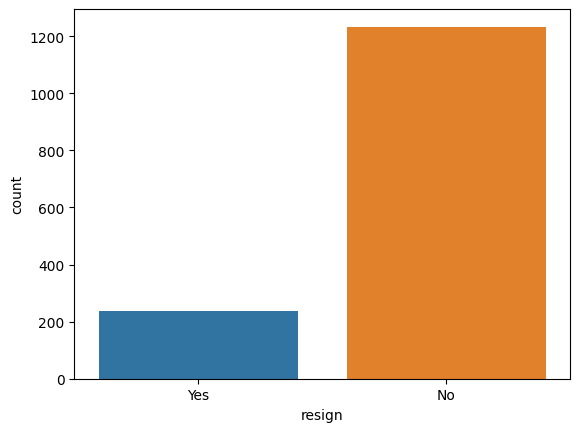

In [20]:
countplot('resign')

<AxesSubplot: xlabel='companies_count', ylabel='Density'>

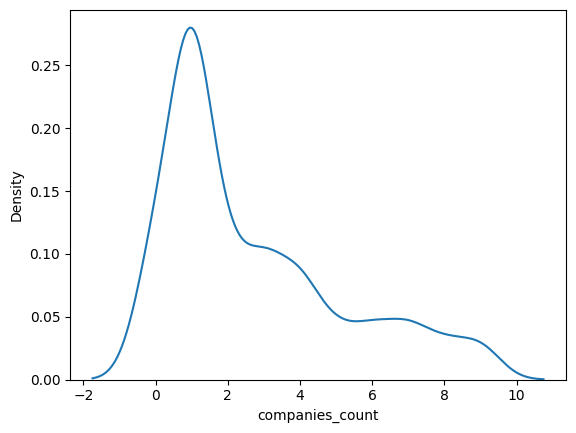

In [21]:
kdeplot('companies_count')

<AxesSubplot: xlabel='division', ylabel='count'>

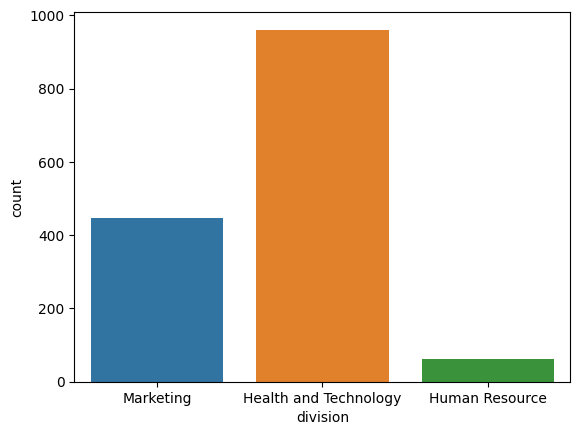

In [22]:
countplot('division')

<AxesSubplot: xlabel='education', ylabel='count'>

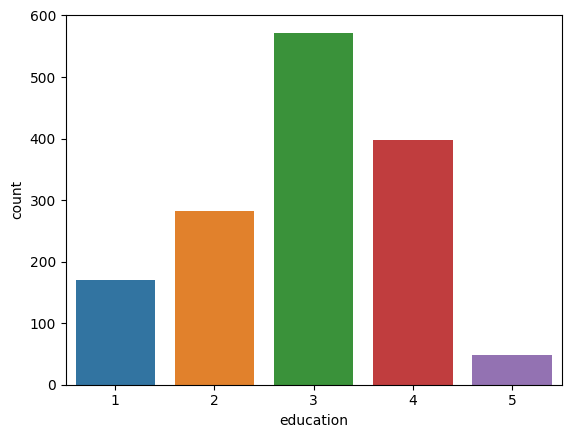

In [23]:
countplot('education')

<AxesSubplot: xlabel='employee_id', ylabel='count'>

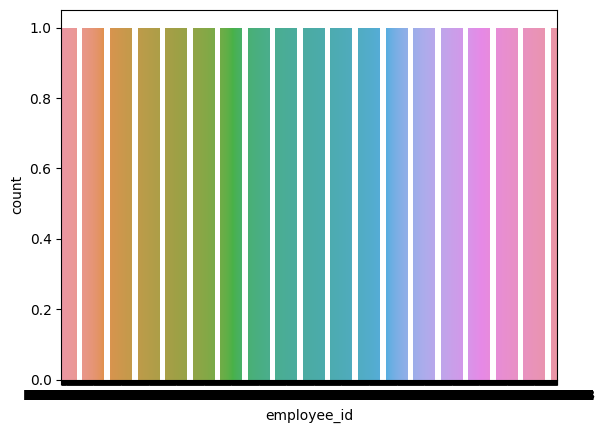

In [24]:
countplot('employee_id')

<AxesSubplot: xlabel='gender', ylabel='count'>

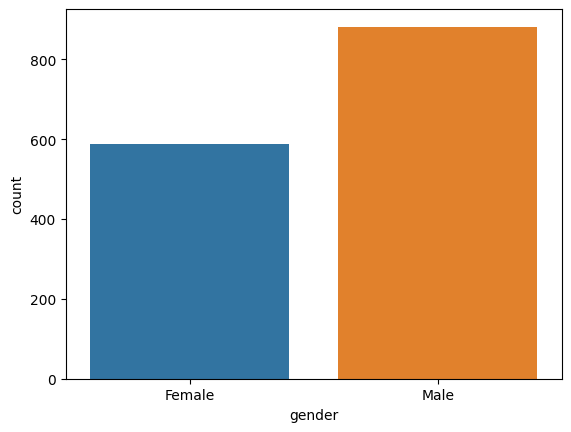

In [25]:
countplot('gender')

<AxesSubplot: xlabel='home_distance', ylabel='Density'>

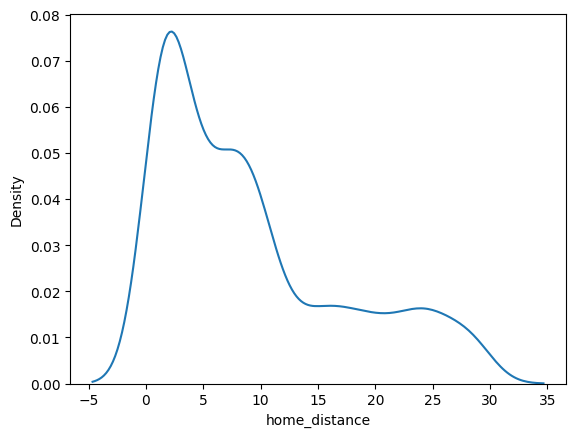

In [26]:
kdeplot('home_distance')

<AxesSubplot: xlabel='hourly_rate', ylabel='Density'>

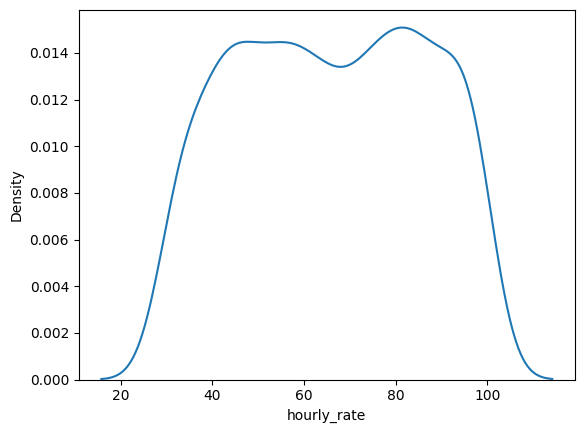

In [27]:
kdeplot('hourly_rate')

<AxesSubplot: xlabel='job_rank', ylabel='count'>

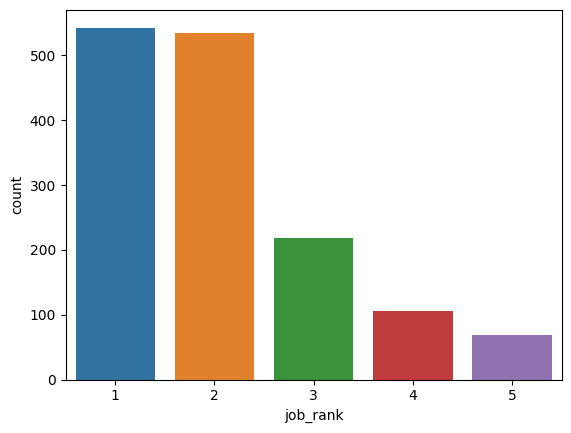

In [28]:
countplot('job_rank')

<AxesSubplot: xlabel='last_year_training_time', ylabel='Density'>

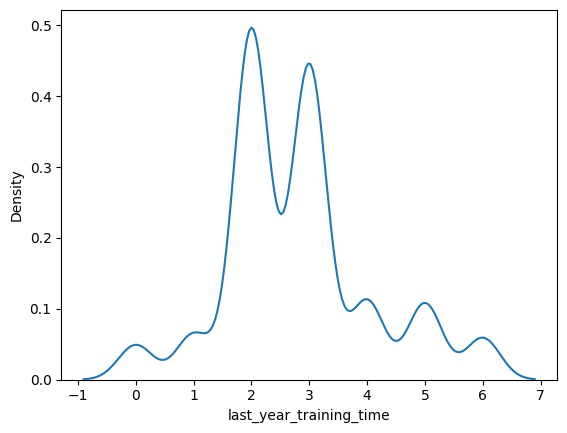

In [29]:
kdeplot('last_year_training_time')

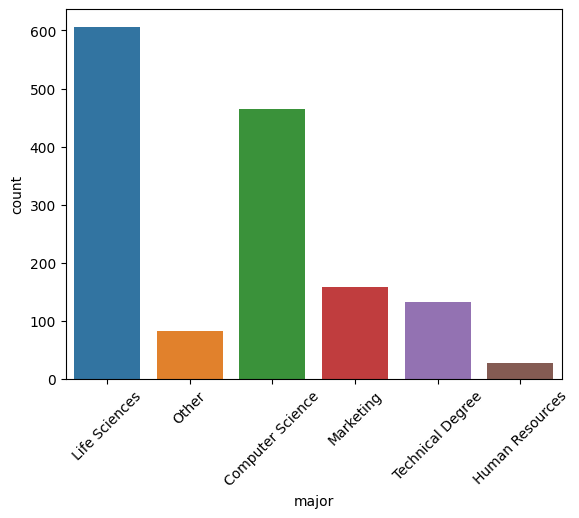

In [30]:
countplot('major')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot: xlabel='marriage_status', ylabel='count'>

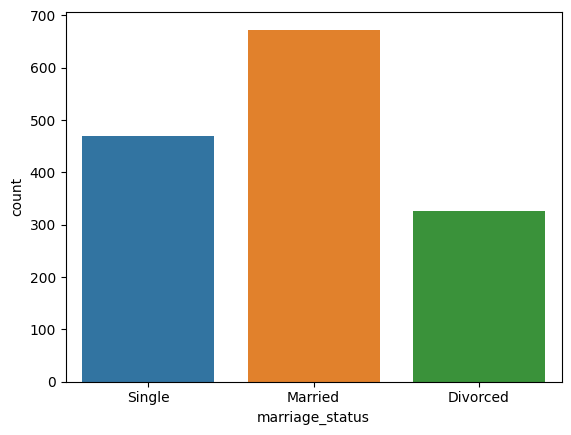

In [31]:
countplot('marriage_status')

<AxesSubplot: xlabel='monthly_income', ylabel='Density'>

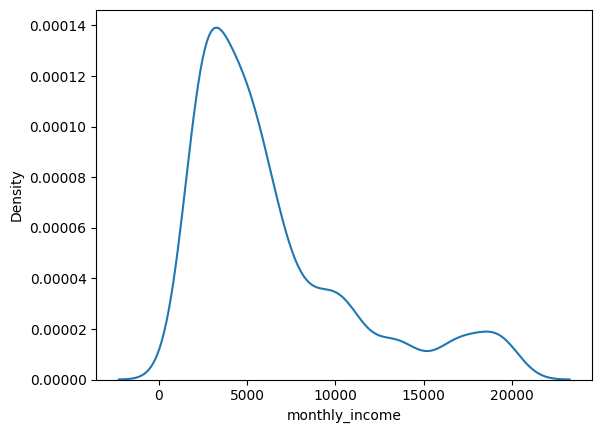

In [32]:
kdeplot('monthly_income')

<AxesSubplot: xlabel='over_time', ylabel='count'>

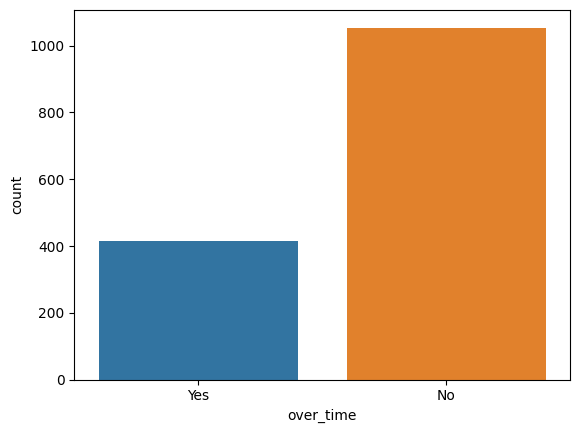

In [33]:
countplot('over_time')

<AxesSubplot: xlabel='rate_performance', ylabel='count'>

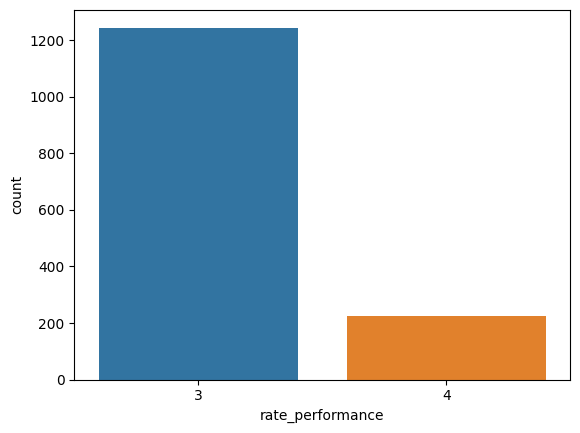

In [34]:
countplot('rate_performance')

<AxesSubplot: xlabel='resign', ylabel='count'>

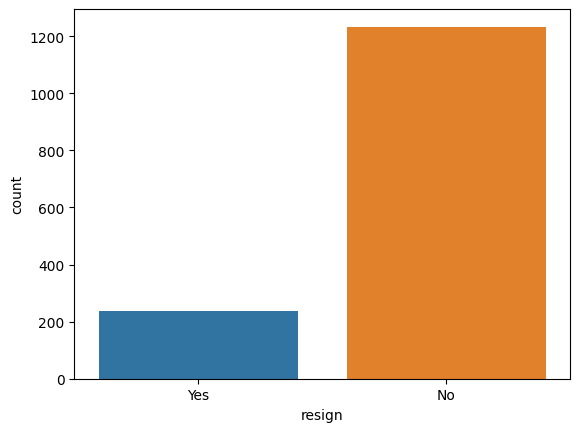

In [35]:
countplot('resign')

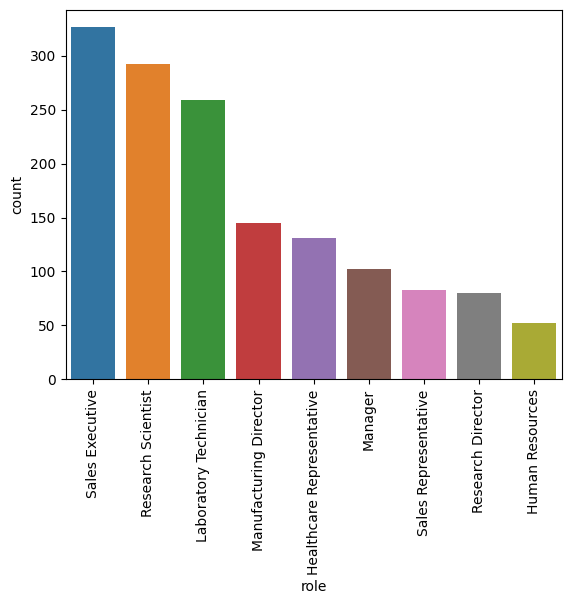

In [36]:
countplot('role')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: xlabel='salary_increment_percentage', ylabel='Density'>

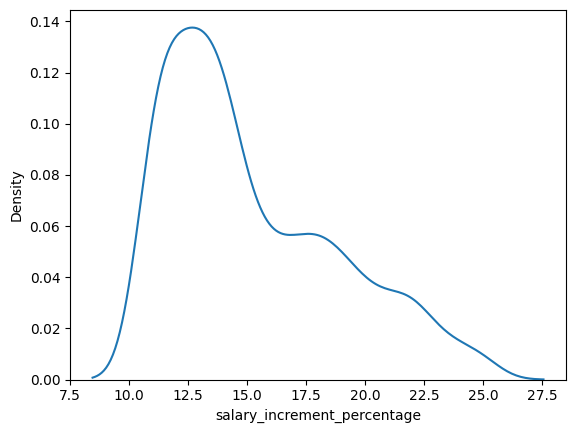

In [37]:
kdeplot('salary_increment_percentage')

<AxesSubplot: xlabel='score_contribution', ylabel='count'>

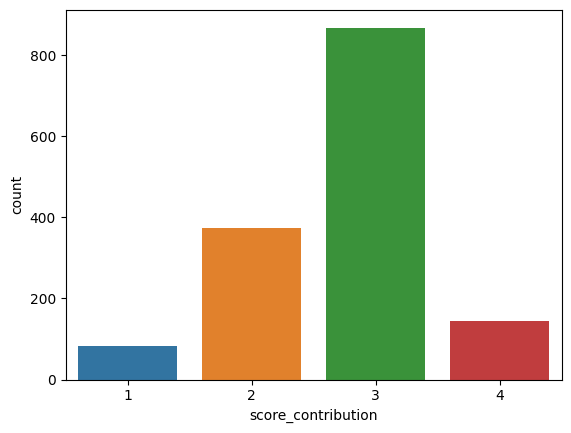

In [38]:
countplot('score_contribution')

<AxesSubplot: xlabel='score_environment', ylabel='count'>

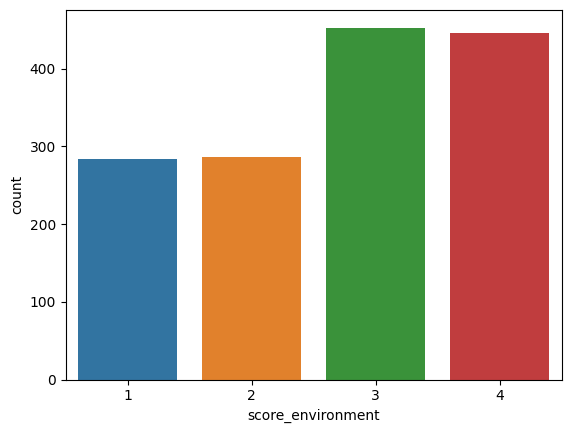

In [39]:
countplot('score_environment')

<AxesSubplot: xlabel='score_work_life_balance', ylabel='count'>

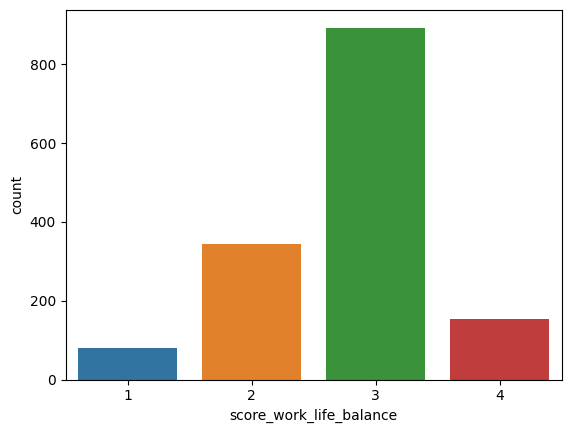

In [40]:
countplot('score_work_life_balance')

<AxesSubplot: xlabel='score_work_relationahip', ylabel='count'>

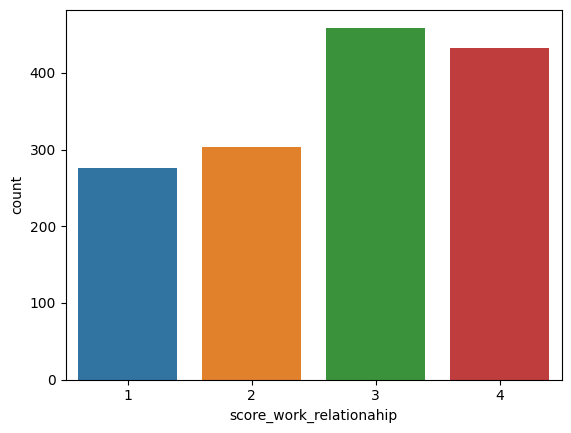

In [41]:
countplot('score_work_relationahip')

<AxesSubplot: xlabel='time_current_company', ylabel='Density'>

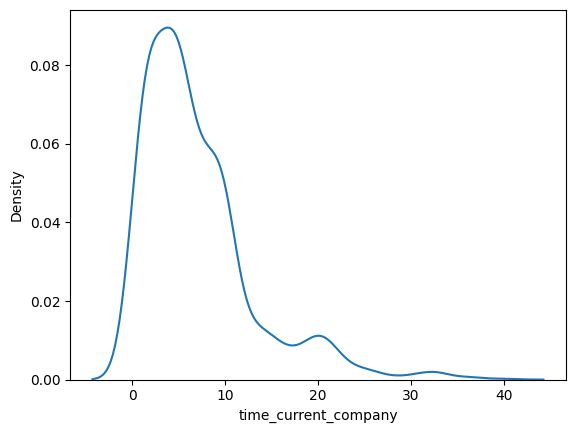

In [42]:
kdeplot('time_current_company')

<AxesSubplot: xlabel='time_current_manager', ylabel='Density'>

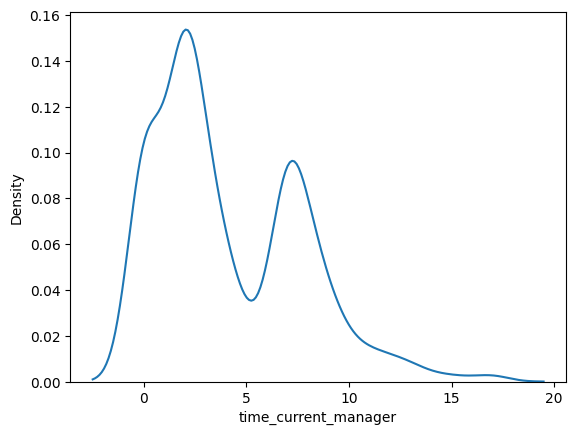

In [43]:
kdeplot('time_current_manager')

<AxesSubplot: xlabel='time_current_role', ylabel='Density'>

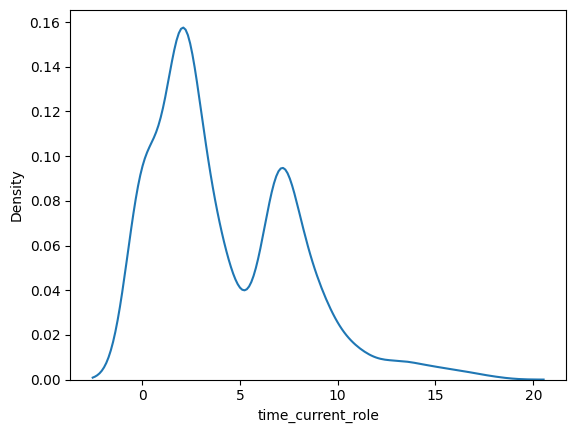

In [44]:
kdeplot('time_current_role')

<AxesSubplot: xlabel='time_last_promotion', ylabel='Density'>

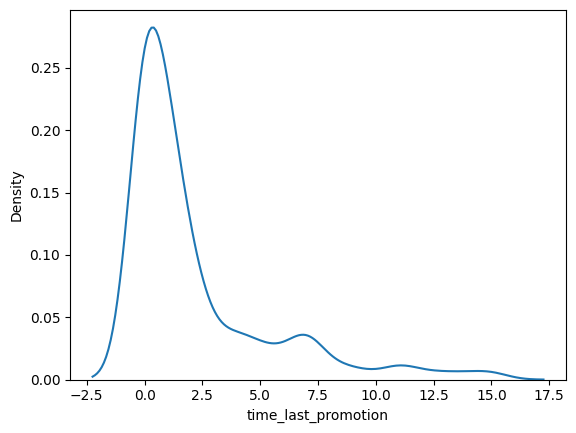

In [45]:
kdeplot('time_last_promotion')

<AxesSubplot: xlabel='time_total_working', ylabel='Density'>

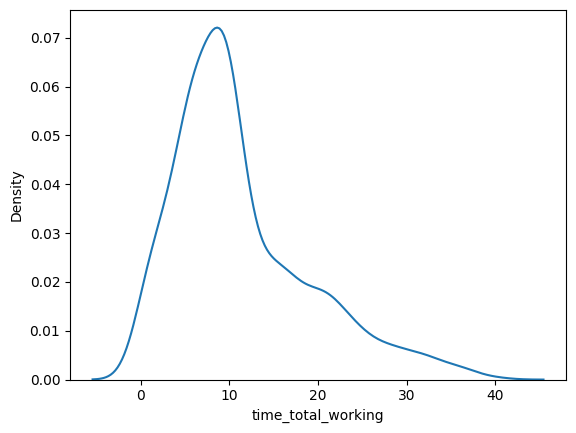

In [46]:
kdeplot('time_total_working')

<AxesSubplot: xlabel='underage', ylabel='count'>

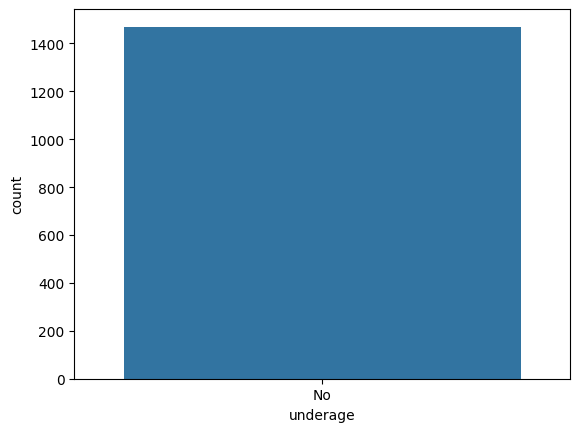

In [47]:
countplot('underage')

<AxesSubplot: xlabel='working_hours', ylabel='count'>

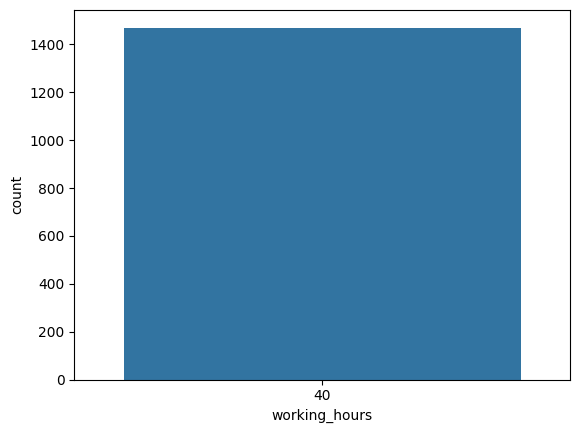

In [48]:
countplot('working_hours')

## Data Exploration

## Data Preprocessing

Ada beberapa fitur yang menurut kami tidak diperlukan atau bisa digantikan oleh fitur lainnya. Pertama, employee_id karena tiap objek memiliki id yang berbeda sehingga tidak diperlukan. Lalu, underage dan working_hours yang kita lihat dari data understanding, hanya berisi satu kategori saja.

In [49]:
selected = df.drop(['employee_id','underage','working_hours'],axis=1)

Tidak ada data yang duplikat dan tidak ada juga nilai null pada data ini sehingga kita tidak perlu melakukan apapun untuk kedua hal tersebut. Namun ada beberapa fitur yang memiliki outlier sehingga perlu ditangani. Kecuali fitur rate_performance yang merupakan fitur yang terdiri dari 2 kelas sehingga sebenarnya itu bukan outlier. Untuk selain fitur itu yang memiliki outlier kami melakukan pengecekan terlebih dahulu terhadap nilai skewness nya untuk memutuskan mengubahnya menjadi mean atau median. Kami menghilangkan opsi untuk menghapus nilai outlier tersebut karena menurut kami nilai outlier pada tiap fitur memiliki presentase yang cukup tinggi.

In [50]:
outlier_var = ['companies_count', 'last_year_training_time', 'monthly_income', 'time_current_company', 'time_current_manager', 'time_current_role', 'time_last_promotion', 'time_total_working']

for var in outlier_var:
    print("skewness variable {} adalah {}".format(var, selected[var].skew()))

skewness variable companies_count adalah 1.026471111968205
skewness variable last_year_training_time adalah 0.5531241710537028
skewness variable monthly_income adalah 1.3698166808390662
skewness variable time_current_company adalah 1.7645294543422085
skewness variable time_current_manager adalah 0.8334509919918475
skewness variable time_current_role adalah 0.9173631562908262
skewness variable time_last_promotion adalah 1.9842899833524859
skewness variable time_total_working adalah 1.1171718528128527


Berdasarkan referensi yang kami dapatkan (https://docs.oracle.com/cd/E57185_01/CBREG/ch03s02s03s01.html) nilai skewness untuk data dengan distribusi normal berada pada rentang [-0.5, 0.5] dimana sesuai juga dengan visualisasi yang telah diberikan, seluruh variabel yang memiliki outlier memiliki distribusi yang skewed sehingga penanganan outlier akan dilakukan dengan mengisi data outlier menggunakan data median.

In [51]:
Jumlah_Outlier1 = []

for col in selected.select_dtypes(np.number).columns:
    outliers = ((selected[col] < (Q1[col] - 1.5 * IQR[col])) | (selected[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier1.append([col, outliers, outliers/len(selected)])
    
indexOutput1 = list(range(0, len(Jumlah_Outlier1)))

pd.DataFrame(Jumlah_Outlier1, columns=['Column', 'Outlier','persentase'],index=indexOutput1).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,last_year_training_time,238,0.161905
1,rate_performance,226,0.153741
2,monthly_income,114,0.077551
3,time_last_promotion,107,0.072789
4,time_current_company,104,0.070748
5,time_total_working,63,0.042857
6,companies_count,52,0.035374
7,time_current_role,21,0.014286
8,time_current_manager,14,0.009524
9,score_work_life_balance,0,0.000000


In [52]:
## Kolom yang memiliki outlier
outlier_var = ['companies_count', 'last_year_training_time', 'monthly_income', 'time_current_company', 'time_current_manager', 'time_current_role', 'time_last_promotion', 'time_total_working']

## Mencari index dari data yang termasuk outlier
outlier_data = []

for col in outlier_var:
  outliers = selected.index[ (selected[col] < (Q1[col] - 1.5 * IQR[col])) | (selected[col] > (Q3[col] + 1.5 * IQR[col])) ]
  outlier_data.append([col, outliers])

## Mengganti outliers dengan nilai median dari masing-masing kolom
for col in outlier_data:
    median = selected[col[0]].median()
    for idx in col[1]:
        selected.loc[idx, col[0]] = median

In [53]:
Jumlah_Outlier2 = []

# temp = selected[['rate_performance','companies_count', 'last_year_training_time', 'monthly_income', 'time_current_company', 'time_current_manager', 'time_current_role', 'time_last_promotion', 'time_total_working']]

for col in selected.select_dtypes(np.number).columns:
    outliers = ((selected[col] < (Q1[col] - 1.5 * IQR[col])) | (selected[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier2.append([col, outliers, outliers/len(selected)])
    
indexOutput2 = list(range(0, len(Jumlah_Outlier2)))

pd.DataFrame(Jumlah_Outlier2, columns=['Column', 'Outlier','persentase'],index=indexOutput2).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,rate_performance,226,0.153741
1,age,0,0.000000
2,home_distance,0,0.000000
3,time_last_promotion,0,0.000000
4,time_current_role,0,0.000000
5,time_current_company,0,0.000000
6,score_work_life_balance,0,0.000000
7,last_year_training_time,0,0.000000
8,time_total_working,0,0.000000
9,score_work_relationahip,0,0.000000


### Cleaned Data

In [54]:
cleaned = selected.copy(deep=True)

In [55]:
print("Missing values pada kolom: ")
cleaned.isnull().sum().sort_values(ascending=False)

Missing values pada kolom: 


age                            0
monthly_income                 0
time_last_promotion            0
time_current_role              0
time_current_company           0
score_work_life_balance        0
last_year_training_time        0
time_total_working             0
score_work_relationahip        0
rate_performance               0
salary_increment_percentage    0
over_time                      0
companies_count                0
marriage_status                0
resign                         0
score_job_satisfication        0
role                           0
job_rank                       0
score_contribution             0
hourly_rate                    0
gender                         0
major                          0
score_environment              0
education                      0
home_distance                  0
division                       0
time_current_manager           0
dtype: int64

In [56]:
stats = cleaned.duplicated().to_frame("redundant")
red = stats[stats["redundant"] == True].count()
print("Jumlah data " + str(red))
stats[stats["redundant"] == True]

Jumlah data redundant    0
dtype: int64


,redundant


In [57]:
Jumlah_Outlier3 = []

for col in cleaned.select_dtypes(np.number).columns:
    outliers = ((cleaned[col] < (Q1[col] - 1.5 * IQR[col])) | (cleaned[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier3.append([col, outliers, outliers/len(cleaned)])
    
indexOutput3 = list(range(0, len(Jumlah_Outlier3)))

pd.DataFrame(Jumlah_Outlier3, columns=['Column', 'Outlier','persentase'],index=indexOutput3).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,rate_performance,226,0.153741
1,age,0,0.000000
2,home_distance,0,0.000000
3,time_last_promotion,0,0.000000
4,time_current_role,0,0.000000
5,time_current_company,0,0.000000
6,score_work_life_balance,0,0.000000
7,last_year_training_time,0,0.000000
8,time_total_working,0,0.000000
9,score_work_relationahip,0,0.000000


## EDA

### A. Visualisasikan karakteristik karyawan yang resign dari perusahaan tersebut!

Menentukan karakteristik dari karyawan yang resign dapat dilakukan dengan banyak pendekatan, terlebih karena ada sekitar 26 fitur yang dapat digunakan dan hasil analisis deskriptif seperti yang ditampilkan pada poin D menunjukkan label resign tidak memiliki korelasi yang signifikan dengan fitur manapun. Oleh karena itu kami akan memilih eksplorasi pada fitur yang kelihatannya akan memiliki pengaruh terhadap pengunduran diri karyawan berdasarkan konteks dan penjelasan dari fitur tersebut. Fitur-fitur yang akan kami pilih pada poin A adalah sebagai berikut:

- age

- gender

- score_environment

- job_rank

- monthly_income

- over_time

- score_work_relationship

Pada poin-poin lainnya pada EDA akan dilakukan eksplorasi pada fitur lain seperti satisfaction dan work_life_balance. 

1. Berapa banyak karyawan yang resign?

Text(0.5, 1.0, 'Perbandingan jumlah karyawan resign di Perusahaan')

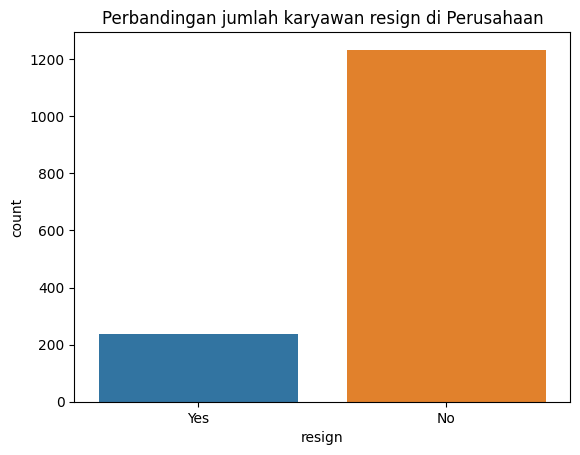

In [58]:
sns.countplot(x="resign", data=cleaned)
plt.title('Perbandingan jumlah karyawan resign di Perusahaan')

Terdapat sekitar 16,12% karyawan perusahaan yang melakukan resign (237 karyawan) sementara yang tidak resign berjumlah 1233 yang menunjukkan hal yang baik karena jumlah karyawan yang bertahan di perusahaan jauh lebih banyak. 

2. Kapan karyawan memutuskan untuk resign?

Text(0.5, 1.0, 'Distribusi Tahun Karyawan Memilih Resign')

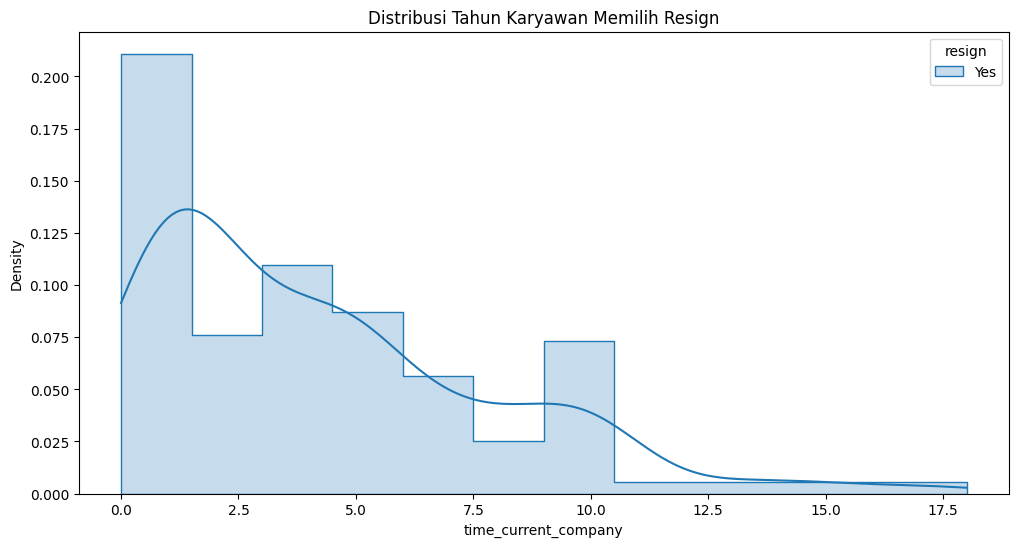

In [59]:
# Plot the distribution of Years at Company by Attrition
plt.figure(figsize=(12,6))
sns.histplot(data=cleaned[cleaned['resign']=="Yes"], x="time_current_company", hue="resign", element="step",
    stat="density", common_norm=False, kde=True)
plt.title('Distribusi Tahun Karyawan Memilih Resign')

Berdasarkan visualisasi tersebut, dapat dilihat bahwa tren pengunduran diri terjadi paling tinggi pada 1 - 2 tahun masa kerja di perusahaan sehingga dapat dikatakan bahwa waktu awal pengenalan (masa awal bekerja ) adalah waktu-waktu kritis yang menentukan apakah karyawan akan memutuskan untuk mengundurkan diri atau tidak. Selanjutnya tren kenaikan kembali terjadi pada tahun ke-5 dan ke-10 dari masa kerja seorang karyawan di perusahaan sehingga ini menunjukkan ada faktor tertentu yang diharapkan karyawan  yang kembali menjadi faktor penentu untuk bertahan / mengundurkan diri dari perusahaan. 


3. Bagaimana distribusi usia karyawan (age) yang resign?

Text(0.5, 1.0, 'Distribusi Usia Karyawan yang Resign')

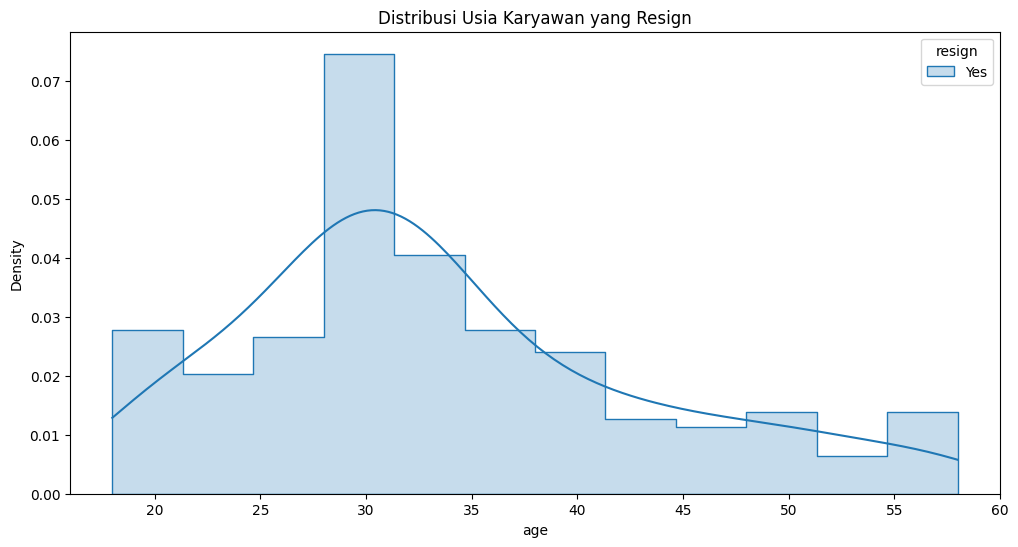

In [60]:
plt.figure(figsize=(12,6))
sns.histplot(data=cleaned[cleaned['resign']=="Yes"], x="age", hue="resign", element="step",
    stat="density", common_norm=False, kde=True)
plt.title('Distribusi Usia Karyawan yang Resign')

Pertama-tama kami akan melihat apakah terdapat hubungan antara usia dengan keputusan seorang karyawan untuk resign, berikut adalah visualisasinya: 
Dapat dilihat bahwa karyawan yang resign lebih didominasi oleh karyawan yang berusia muda (sekitar 20 hingga pertengahan 30). Pola ini membuat kami tertarik untuk mengetahui apakah karyawan pada kelompok umur tersebut memang sering berpindah-pindah perusahaan, sehingga kami menambahkan poin ini pada eksplorasi G. 


4. Apakah ada pengaruh antara jenis kelamin karyawan (gender) terhadap pengunduran diri dari perusahaan?

Text(0.5, 1.0, 'Distribusi Gender Karyawan')

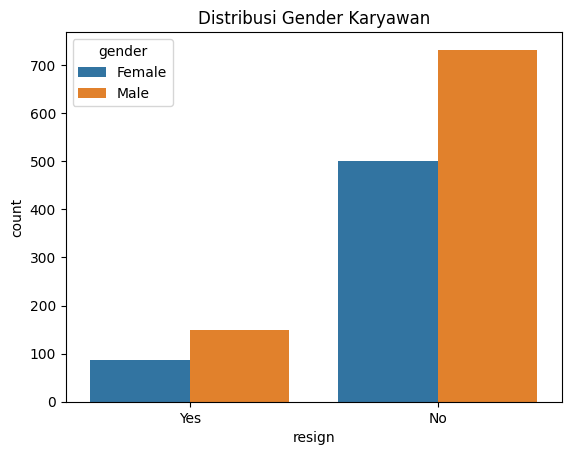

In [61]:
sns.countplot(data=cleaned, x="resign", hue="gender")
plt.title('Distribusi Gender Karyawan')

Berdasarkan pengamatan tersebut kami rasa tidak terdapat pengaruh antara gender dengan pengunduran diri karyawan karena nilai resignation pada perempuan dan laki-laki sama-sama rendah dan relatif hanya menampilkan bahwa di perusahaan lebih banyak karyawan yang berjenis kelamin laki-laki

5. Apakah terdapat keterkaitan antara status pernikahan (marriage_status) dengan pengunduran diri karyawan? 

Ketika seseorang menikah maka orang tersebut akan memiliki tanggung jawab yang lebih besar dan otomatis juga memiliki tanggungan finansial yang lebih besar sehingga dalam hipotesis awal kami menilai bahwa karyawan yang menikah relatif tidak akan meninggalkan perusahaan dan karyawan yang meninggalkan perusahaan akan lebih banyak berstatus single. Pertama-tama mari kita lihat pertama-tama berapa banyak karyawan dalam status menikah yang memutuskan untuk resign?

Text(0.5, 1.0, 'Pie Chart Status Pernikahan Karyawan')

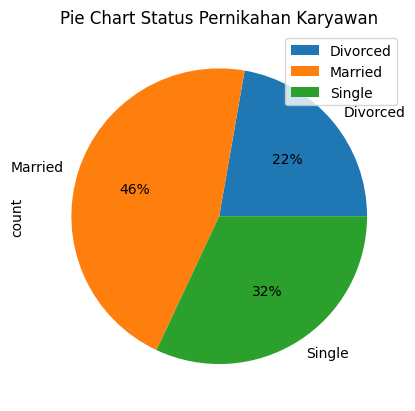

In [62]:
count_married = len(cleaned[cleaned['marriage_status'] == 'Married'])
count_divorced = len(cleaned[cleaned['marriage_status'] == 'Divorced'])
count_single = len(cleaned[cleaned['marriage_status'] == 'Single'])

cm = np.array([count_married, count_divorced, count_single])

df_marriage_status = pd.DataFrame({'Status': ['Married','Divorced', 'Single'], 'count': cm})
df_marriage_status.groupby(['Status']).sum().plot(kind='pie', y='count', autopct='%1.0f%%')

plt.title('Pie Chart Status Pernikahan Karyawan')
  

88% karyawan perusahaan sudah pernah menikah (46% masih berstatus menikah dan 22% berstatus divorce). Artinya mayoritas karyawan memiliki tanggung jawab finansial yang besar karena harus mencukupi kebutuhan finansial keluarga. 

/tmp/ipykernel_2271/3239862186.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_married = len(cleaned[cleaned['resign'] == 'Yes'][cleaned['marriage_status'] == 'Married'])
/tmp/ipykernel_2271/3239862186.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_divorced = len(cleaned[cleaned['resign'] == 'Yes'][cleaned['marriage_status'] == 'Divorced'])
/tmp/ipykernel_2271/3239862186.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_single = len(cleaned[cleaned['resign'] == 'Yes'][cleaned['marriage_status'] == 'Single'])


Text(0.5, 1.0, 'Pie Chart Status Pernikahan Karyawan yang Resign')

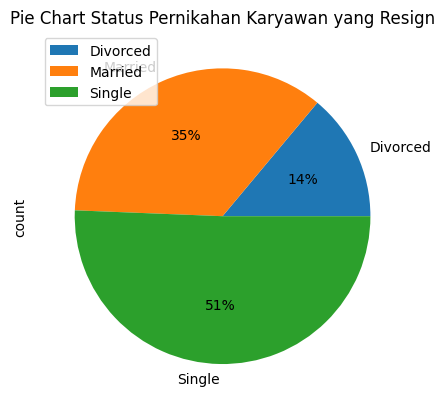

In [63]:
count_married = len(cleaned[cleaned['resign'] == 'Yes'][cleaned['marriage_status'] == 'Married'])
count_divorced = len(cleaned[cleaned['resign'] == 'Yes'][cleaned['marriage_status'] == 'Divorced'])
count_single = len(cleaned[cleaned['resign'] == 'Yes'][cleaned['marriage_status'] == 'Single'])

cm = np.array([count_married, count_divorced, count_single])
#print(selected.groupby('marriage_status'))
#.plot.pie(y=cm, figsize=(3, 3), autopct='%1.0f%%')

df_marriage_status = pd.DataFrame({'Status': ['Married','Divorced', 'Single'], 'count': cm})
df_marriage_status.groupby(['Status']).sum().plot(kind='pie', y='count', autopct='%1.0f%%')
plt.title('Pie Chart Status Pernikahan Karyawan yang Resign')
  

Karena nilai distribusi kelas yang relatif imbalanced, agak sulit untuk menentukan apakah karyawan yang menikah relatif akan bertahan di perusahaan (seperti hipotesis awal). Namun demikian dapat dilihat dari visualisasi ini bahwa mayoritas karyawan yang melakukan resign (51%) berstatus single, sehingga hipotesis kedua dapat dikatakan benar yaitu karyawan yang resign kebanyakan berstatus single. Hal ini mungkin terjadi karena karyawan yang berstatus single relatif memiliki kebutuhan finansial yang lebih rendah dibandingkan yang sudah menikah.

6. Bagaimana keterkaitan lingkungan kerja terhadap pengunduran diri karyawan? (Dilihat berdasarkan fitur score_environment)

Text(0.5, 1.0, 'Distribusi Penilaian Score_Environment Karyawan Resign')

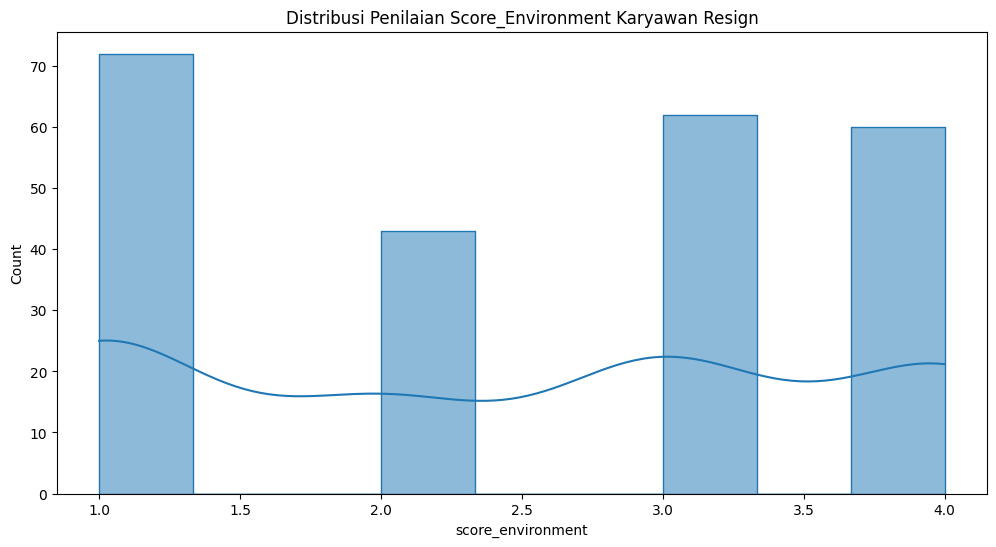

In [64]:
plt.figure(figsize=(12,6))
sns.histplot(data=cleaned[cleaned['resign'] == 'Yes'], x="score_environment", element="step", common_norm=False, kde=True)
plt.title('Distribusi Penilaian Score_Environment Karyawan Resign')

Berdasarkan visualisasi di atas, sepertinya agak sulit untuk mengatakan bahwa fitur ini mempengaruhi resignation karena dapat dilihat tetap ada karyawan yang memutuskan untuk resign meskipun menilai lingkungan kerja dengan baik (skala 3 - 4). Namun salah satu insight yang dapat diambil dari fitur ini adalah karyawan yang memutuskan untuk resign kebanyakan memberikan nilai 1 untuk score_environment. 


72
/tmp/ipykernel_2271/499862484.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_resign = len(cleaned[cleaned['resign'] == 'Yes'][cleaned['score_environment'] == 1])
/tmp/ipykernel_2271/499862484.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_not = len(cleaned[cleaned['resign'] == 'No'][cleaned['score_environment'] == 1])
/tmp/ipykernel_2271/499862484.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(cleaned[cleaned['resign'] == 'Yes'][cleaned['score_environment'] == 1]))


Text(0.5, 1.0, 'Pie Chart Distribusi Karyawan dengan score_environment terendah (1)')

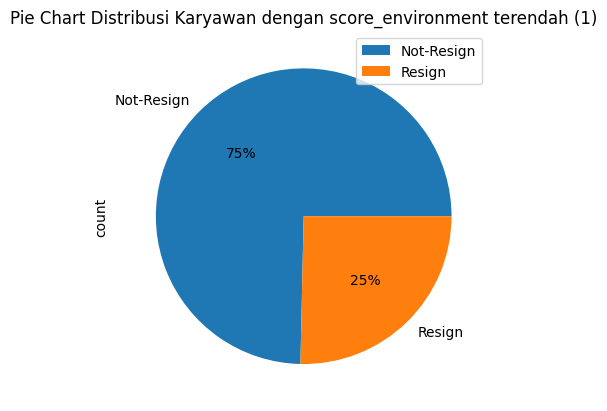

In [65]:
count_resign = len(cleaned[cleaned['resign'] == 'Yes'][cleaned['score_environment'] == 1])
count_not = len(cleaned[cleaned['resign'] == 'No'][cleaned['score_environment'] == 1])
print(len(cleaned[cleaned['resign'] == 'Yes'][cleaned['score_environment'] == 1]))
ces = np.array([count_resign, count_not])

df_marriage_status = pd.DataFrame({'Status': ['Resign', 'Not-Resign'], 'count': ces})
df_marriage_status.groupby(['Status']).sum().plot(kind='pie', y='count', autopct='%1.0f%%')
plt.title('Pie Chart Distribusi Karyawan dengan score_environment terendah (1)')

Di sisi lain, karyawan yang menilai lingkungan kerja buruk (nilai = 1) juga hanya 25% yang memilih untuk keluar sementara yang lainnya tetap di perusahaan sehingga dapat disimpulkan penilaian terhadap lingkungan kerja tidak menjadi karakteristik khusus yang dapat membedakan karyawan resign / tidak resign

7. Apakah karyawan yang mengundurkan diri bekerja lembur (over_time)?

Text(0.5, 1.0, 'Distribusi over_time Karyawan')

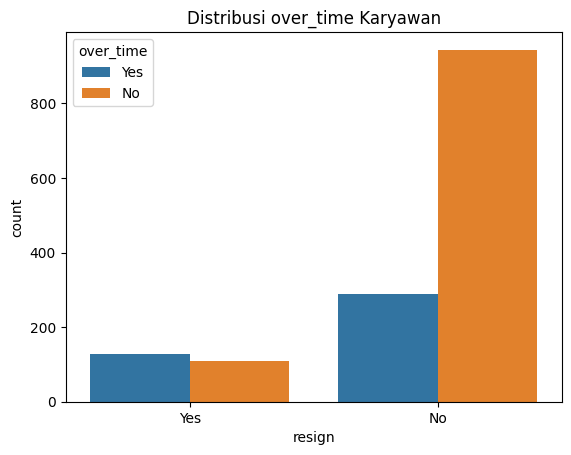

In [66]:
sns.countplot(data=cleaned, x="resign", hue="over_time")
plt.title('Distribusi over_time Karyawan')


Apabila di lihat dari gambar di atas, di antara karyawan yang resign, jumlah karyawan yang bekerja overtime memang lebih banyak, namun dapat kita lihat juga bahwa lebih banyak pekerjfma overtime yang memilih untuk tidak resign sehingga berdasarkan visualisasi kami tidak berpikir overtime akan mempengaruhi resignation. Hal ini cukup memberikan insight yang cukup mengejutkan karena baik over_time maupun score_environment ternyata tidak menentukan (secara si apakah karyawan akan melakukan pengunduran diri. 

8. Apakah terdapat keterkaitan antara jabatan dengan pengunduran diri karyawan (job_rank)?

Text(0.5, 1.0, 'Distribusi Job Rank Karyawan')

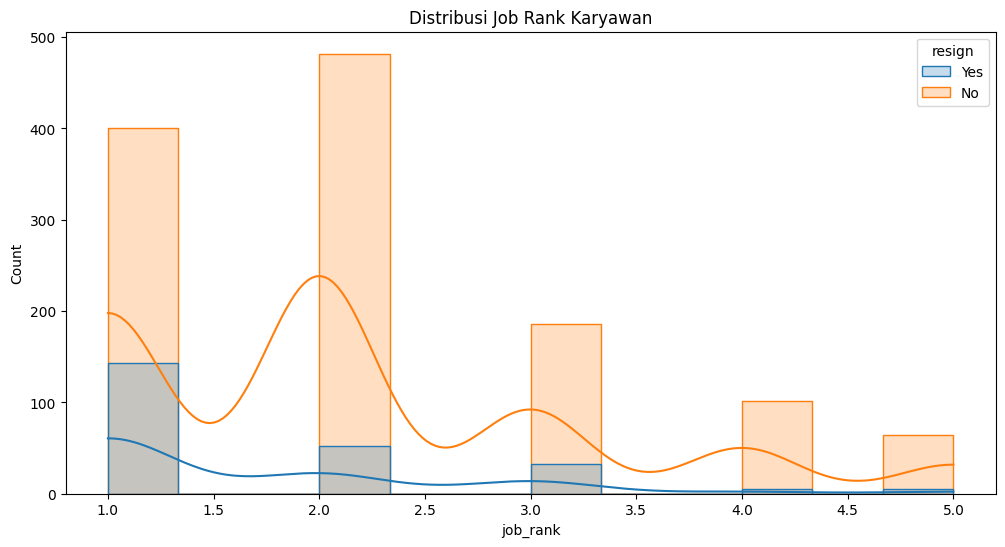

In [67]:
# Plot the distribution of Years at Company by Attrition
plt.figure(figsize=(12,6))
sns.histplot(data=cleaned, x="job_rank", hue="resign", element="step",common_norm=False, kde=True)
plt.title('Distribusi Job Rank Karyawan')

- Mayoritas karyawan memiliki job rank 1 atau 2

- Karyawan yang resign paling banyak memiliki job rank 1 

- Persentase karyawan yang resign pada job rank yang tinggi (4 dan 5) relatif sangat kecil

Kesimpulan 

- Karyawan paling banyak resign pada tahun 1-2 bekerja di perusahaan, tren kemudian kembali meningkat pada tahun ke-5 dan ke-10

- Karyawan yang resign umumnya berusia muda (di bawah 20 tahun hingga pertengahan 30 tahun)

- Karyawan yang resign mayoritas memiliki status pernikahan single

- Menariknya, penilaian karyawan terhadap lingkungan kerja dan waktu bekerja yang overtime relatif tidak berkaitan dengan keputusan karyawan untuk mengundurkan diri. 

- Kebanyakan karyawan resign memiliki job rank 1

### B. Apakah karyawan memilih untuk resign setelah mendapatkan promosi?


1. Asumsi

Karena data yang ada (time_last_promotion, time_current_company) bersifat tahunan, jadi asumsi tambahan yang kami berikan adalah ketika ada yang pekerja yang job_ranknya adalah 1 (entry level) , maka promosi terakhir (dalam data) adalah ketika dia menjadi karyawan perusahan tersebut atau dengan kata lain belum mendapatkan promosi selama bekerja di perusahaan tersebut. Sehingga data yang memiliki sifat seperti itu kami anggap tidak pernah mendapatkan promosi sebelumnya. Asumsi lain untuk kasus ini adalah jangka waktu promosi yang dekat adalah ketika kurang dari 1 tahun, sehingga kami akan membuat pembanding untuk yang mendapatkan promosi kurang dari 1 tahun dari sekarang.

2. Memisahkan karyawan yang bukan non-entry level.

In [68]:
use_for_b = cleaned[["resign","job_rank","time_last_promotion"]]
use_for_b["promotion_as_new"] = np.where(use_for_b["job_rank"] == 1, 1,0)

/tmp/ipykernel_2271/460368306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_for_b["promotion_as_new"] = np.where(use_for_b["job_rank"] == 1, 1,0)


In [69]:
filter_b = use_for_b[use_for_b["promotion_as_new"] == 0]
filter_b = filter_b.drop(["job_rank","promotion_as_new"],axis=1)
filter_b.count()

resign                 927
time_last_promotion    927
dtype: int64

In [70]:
filter_b

,resign,time_last_promotion
0,Yes,0.0
1,No,1.0
8,No,1.0
9,No,7.0
11,No,0.0
...,...,...
1465,No,0.0
1466,No,1.0
1467,No,0.0
1468,No,0.0


3. Memisahkan karyawan yang baru saja dipromosikan 1 tahun terakhir.

In [71]:
last_promotion_1_year = filter_b[filter_b["time_last_promotion"] < 1]
last_promotion_1_year.count()

resign                 321
time_last_promotion    321
dtype: int64

4. Melihat pesebaran dari karyawan yang baru saja di promosikan.

In [72]:
last_promotion_1_year.groupby(by=["resign"]).count()

,time_last_promotion
resign,
No,289
Yes,32


<AxesSubplot: ylabel='time_last_promotion'>

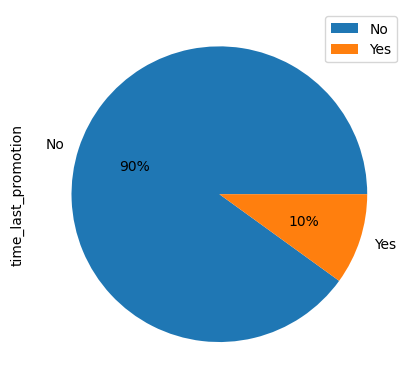

In [73]:
last_promotion_1_year.groupby(by=["resign"]).count().plot(kind='pie', y='time_last_promotion', autopct='%1.0f%%')

<AxesSubplot: xlabel='resign', ylabel='count'>

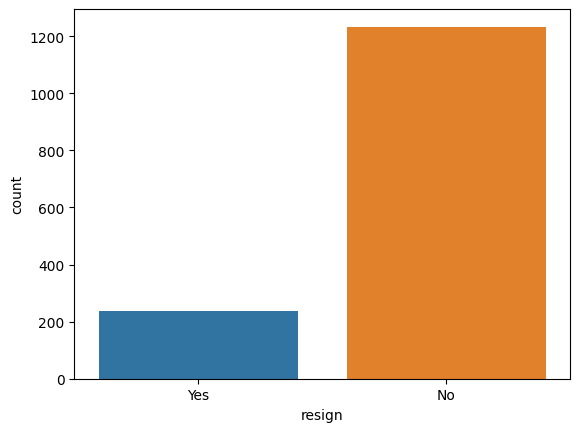

In [74]:
countplot("resign")

5. Analisis & Interpretasi

Dari hasil analisis tersebut di dapatkan bahwa 90% pegawai memilih untuk tidak resign setelah mendapatkan promosi, meskipun 10% lainnya memilih untuk resign. Jadi kesimpulan yang dapat kita ambil adalah promosi cukup mempengaruhi keputusan pegawai untuk resign atau tidak.

### C. Departemen manakah yang memiliki karyawan loyal paling banyak?


1. Asumsi

Asumsi yang kami ambil untuk kasus ini adalah karyawan loyal yang dimaksudkan adalah karyawan yang  sudah bekerja 10 tahun atau lebih untuk perusahaan ini. Angka 10 ini kami ambil dari grafik densitas yang sudah ditampilkan sebelumnya (bagian A sub Kapan karyawan memutuskan untuk resign?) yang menunjukan pada masa 10 tahun adalah masa terakhir sebelum akhirnya grafiknya benar benar landai.

2. Keseluruhan Karyawan yang loyal (berdasarkan definisi di asumsi)

In [75]:
use_for_c = cleaned[["division","time_current_company"]]
filter_c = use_for_c[use_for_c["time_current_company"] >= 10]

In [76]:
filter_c.count()

division                262
time_current_company    262
dtype: int64

3. Karyawan loyal berdasarkan divisi

In [77]:
filter_c.groupby(by=["division"]).count()

,time_current_company
division,
Health and Technology,164
Human Resource,8
Marketing,90


<AxesSubplot: ylabel='time_current_company'>

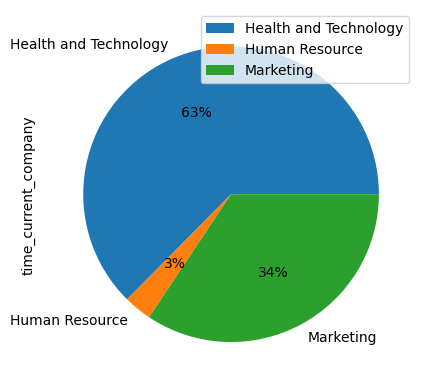

In [78]:
filter_c.groupby(by=["division"]).count().plot(kind='pie', y='time_current_company', autopct='%1.0f%%')

<AxesSubplot: xlabel='division', ylabel='count'>

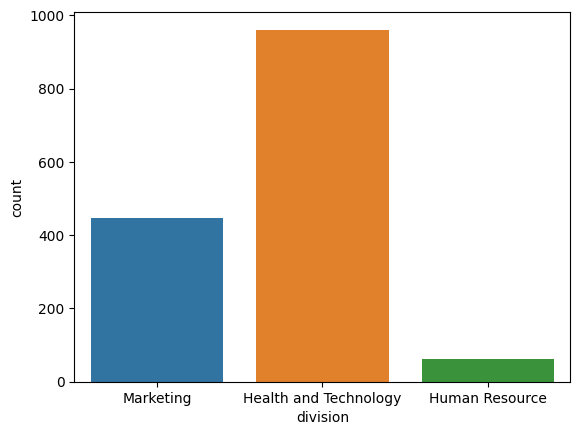

In [79]:
countplot("division")

4. Analisis dan Interpretasi

Dari pesebaran di atas bisa dilihat bahwa divisi yang paling loyal adalah divisi Health and Technology disusul dengan divisi marketing dan yang paling tidak loyal adalah divisi Human Resource.

### D. Lakukan analisis korelasi antar atribut, visualisasikan atribut-atribut yang memiliki korelasi. Jika ada, sampaikan pendapat anda mengenai keterkaitan atribut tersebut


In [80]:
#library untuk pra pemrosesan data kategorik ke numerik
from sklearn import preprocessing 

corr_df = selected.copy()

columns = ['division', 'resign', 'gender', 'major', 'marriage_status', 'role', ]
encoder = preprocessing.LabelEncoder()

#Pengubahan untuk feature column
for column in columns:
  encoder.fit(corr_df[column])
  corr_df[column] = encoder.transform(corr_df[column])

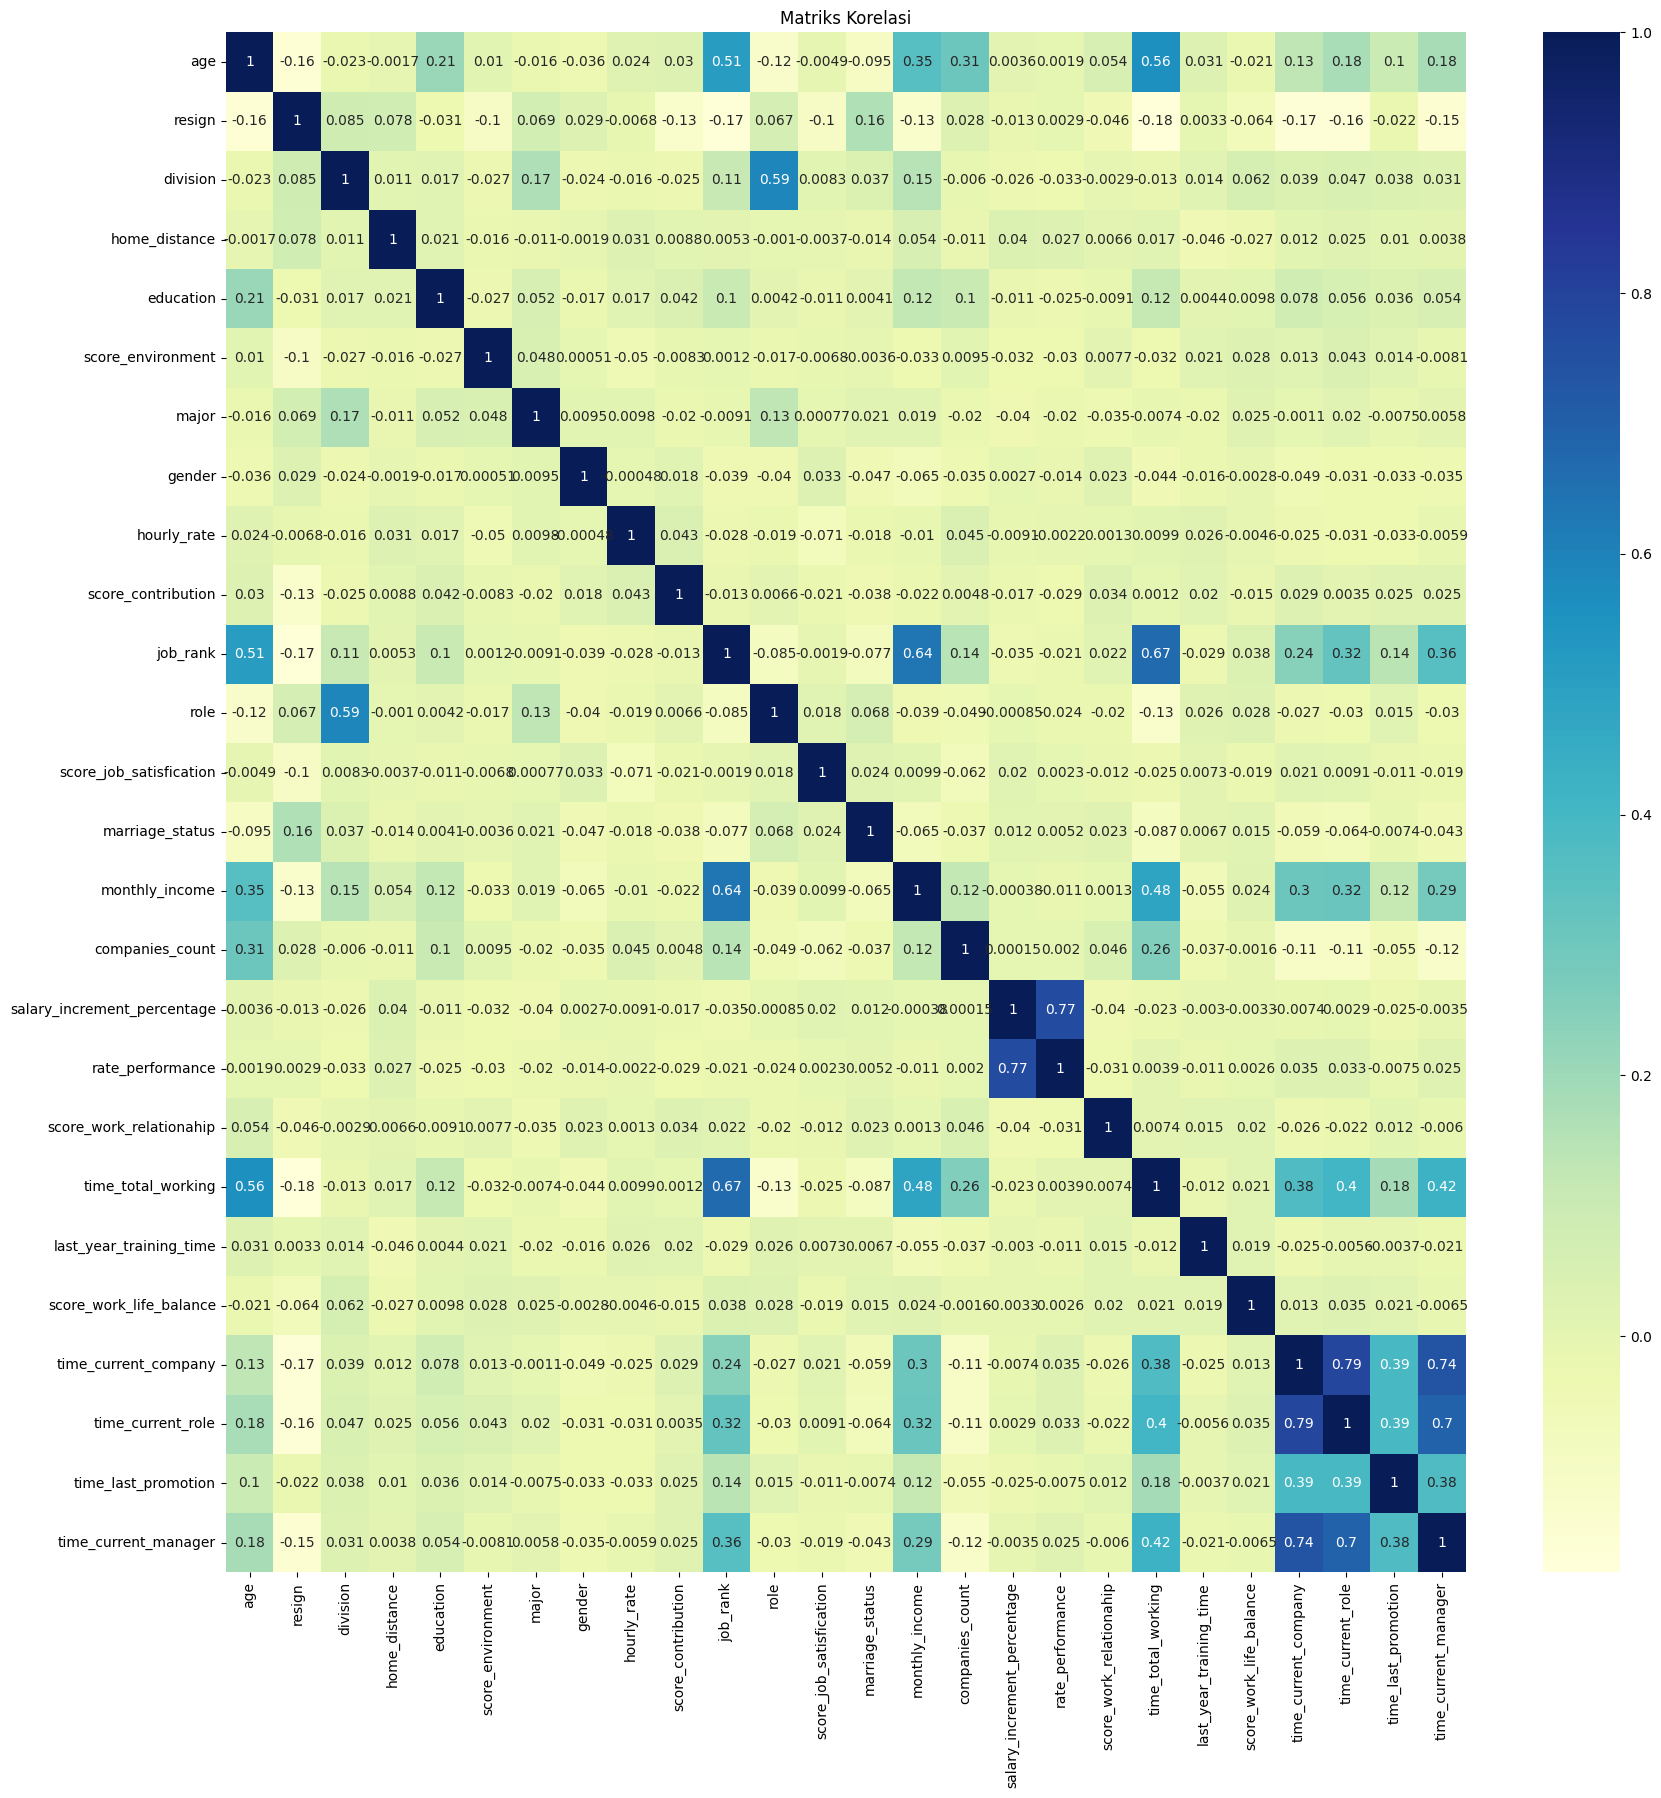

In [81]:
#Menggambarkan matriks korelasi menggunakan heatmap
plt.figure(figsize=(20,20))
cor = corr_df.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.title("Matriks Korelasi")
plt.show()

Jika dilihat dari nilai korelasi antara label 'resign' dengan atribut lainnya, dapat terlihat bahwa atribut ini tidak memiliki korelasi yang besar dengan atribut / fitur manapun. Namun demikian, berdasarkan scatter plot kita dapat melihat korelasi antar atribut sebagai berikut:

- time_total_working dan job_rank memiliki korelasi yang tinggi (0.67) hal ini sesuai dengan konteks nyata yaitu orang yang memiliki pengalaman bekerja banyak (dalam tahun) juga akan memiliki job_rank yang relatif tinggi. 

- job_rank juga memiliki korelasi yang besar dengan monthly_income (0.64), dalam konteks di perusahaan ini maka kita dapat menilai apabila seseorang memiliki job_rank yang tinggi maka pendapatannya per bulan juga akan besar. 

- time_current_company, time_current_role, dan time_current_manager memiliki nilai korelasi yang sama-sama besar antar atributnya : time_current_company & timecurrent_role (0.79), time_current_company & time_current_manager (0.74), time_current_role & time_current_manager (0.7). Hal ini dapat menunjukkan salah satunya: orang-orang di dalam perusahaan yang sudah lama menekuni pekerjaan tersebut (role) relatif sudah lama bekerja juga di perusahaan, juga dapat menunjukkan bahwa orang-orang yang bekerja lama dengan manager saat ini relatif loyal karena sudah bekerja lama juga dengan perusahaan.

- salary_increment_percentage dan rate_performance juga memiliki nilai korelasi yang besar (0.77) yang dapat menunjukkan peningkatan persentase gaji akan sebanding dengan performance dalam pekerjaan. 

- Nilai hourly_rate tidak berkorelasi dengan monthly_income (-0.01) yang menurut kelompok kami cukup membingungkan karena artinya terdapat sejumlah pendapatan lain yang didapat di luar dari pendapatan bekerja (per jam). Namun karena nilai monthly_income memiliki korelasi yang besar terhadap job_rank maka ke depannya kami akan memilih untuk menggunakan nilai monthly_income dibandingkan hourly_rate. 

### E. Apakah semakin tinggi edukasi karyawan maka semakin mungkin ia keluar dari perusahaan?

Education Type 1


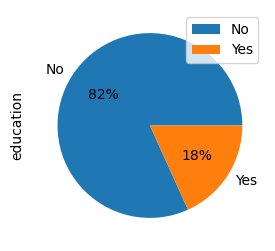

In [82]:
# mau make pie chart
df_filtered = cleaned[cleaned['education'] == 1]

# display(df_filtered)

df_filtered.groupby(['resign']).sum().plot.pie(y='education', figsize=(3, 3), autopct='%1.0f%%')
print("Education Type 1")

Education Type 2


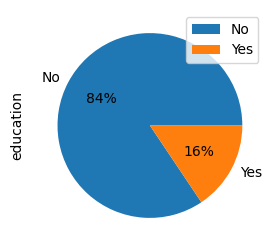

In [83]:
# mau make pie chart
df_filtered = cleaned[cleaned['education'] == 2]

# display(df_filtered)

df_filtered.groupby(['resign']).sum().plot.pie(y='education', figsize=(3, 3), autopct='%1.0f%%')
print("Education Type 2")

Education Type 3


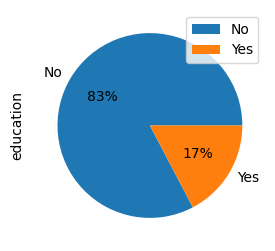

In [84]:
# mau make pie chart
df_filtered = cleaned[cleaned['education'] == 3]
# display(df_filtered)

df_filtered.groupby(['resign']).sum().plot.pie(y='education', figsize=(3, 3), autopct='%1.0f%%')
print("Education Type 3")

Education Type 4


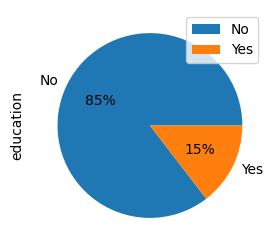

In [85]:
# mau make pie chart
df_filtered = cleaned[cleaned['education'] == 4]

# display(df_filtered)

df_filtered.groupby(['resign']).sum().plot.pie(y='education', figsize=(3, 3), autopct='%1.0f%%')
print("Education Type 4")

Education Type 5


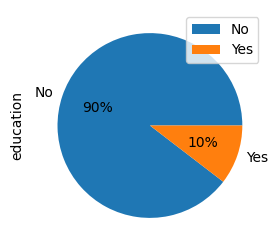

In [86]:
# mau make pie chart
df_filtered = cleaned[cleaned['education'] == 5]

# display(df_filtered)

df_filtered.groupby(['resign']).sum().plot.pie(y='education', figsize=(3, 3), autopct='%1.0f%%')
print("Education Type 5")

Beberapa pie chart diatas menunjukkan probabilitas seorang karyawan dengan tingkat edukasi tertentu untuk resign. Berdasarkan pie chart tersebut, karyawan dengan tingkat edukasi yang lebih tinggi memiliki kemungkinan yang semakin kecil untuk resign.

Summary of the charts (Persentase/probabilitas seseorang resign berdasarkan tingkat edukasi):

- Tipe 1: 18%

- Tipe 2: 16%

- Tipe 3: 17%

- Tipe 4: 15%H. Bagaimana pengaruh satisfaction dan work life balance terhadap employee retention?

- Tipe 5: 10%

<AxesSubplot: xlabel='Tipe Pendidikan', ylabel='Probabilitas Resign'>

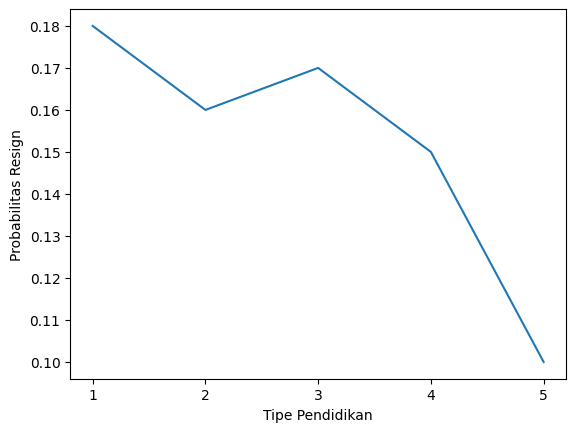

In [87]:
probabilitas = [['1', 0.18], ['2', 0.16], ['3', 0.17], ['4', 0.15], ['5', 0.10]]
df_line_prob = pd.DataFrame(probabilitas, columns=['Tipe Pendidikan', 'Probabilitas Resign'])
sns.lineplot(data=df_line_prob, x="Tipe Pendidikan", y="Probabilitas Resign")

### F. Karyawan dengan tingkat edukasi (education level) mana yang paling memungkinkan untuk resign dari perusahaan?

Beberapa pie chart diatas menunjukkan probabilitas seorang karyawan dengan tingkat edukasi tertentu untuk resign. Berdasarkan pie chart tersebut, karyawan dengan tingkat edukasi yang memiliki probabilitas paling tinggi untuk melakukan pengunduran adalah karyawan dengan tingkat edukasi 1.

### G. Seberapa sering karyawan berpindah perusahaan (jika dilihat berdasarkan pengelompokan umur)?

Pada dataset, kolom age memiliki nilai
 dari 18 tahun sampai 60 tahun. Agar
 saat divisualisasikan lebih mudah
 dipahami, kami membuat beberapa
 kelompok umur.

In [88]:
cleaned1 = cleaned[['age','companies_count']].copy(deep=True)
cleaned2 = cleaned[['age','companies_count']].copy(deep=True)

In [89]:
cleaned1.groupby(['age']).mean().round(2)

,companies_count
age,
18,1.00
19,0.89
20,1.00
21,1.00
22,1.25
23,1.21
24,1.12
25,1.88
26,1.56


In [90]:
cleaned2['age_group']= ' '
cleaned2.loc[cleaned2['age']<=27, 'age_group'] = '18-27'
cleaned2.loc[cleaned2['age'].between(28,37), 'age_group'] = '28-37'
cleaned2.loc[cleaned2['age'].between(38,47), 'age_group'] = '38-47'
cleaned2.loc[cleaned2['age']>47, 'age_group'] = '48-60'
display(cleaned2)

,age,companies_count,age_group
0,41,8.0,38-47
1,49,1.0,48-60
2,37,6.0,28-37
3,33,1.0,28-37
4,27,2.0,18-27
...,...,...,...
1465,36,4.0,28-37
1466,39,4.0,38-47
1467,27,1.0,18-27
1468,49,2.0,48-60


In [91]:
cleaned3 = cleaned2.drop(columns=['age'])
display(cleaned3)

,companies_count,age_group
0,8.0,38-47
1,1.0,48-60
2,6.0,28-37
3,1.0,28-37
4,2.0,18-27
...,...,...
1465,4.0,28-37
1466,4.0,38-47
1467,1.0,18-27
1468,2.0,48-60


In [92]:
cleaned3.groupby(['age_group']).mean().round(2)

,companies_count
age_group,
18-27,1.37
28-37,2.15
38-47,2.98
48-60,3.38


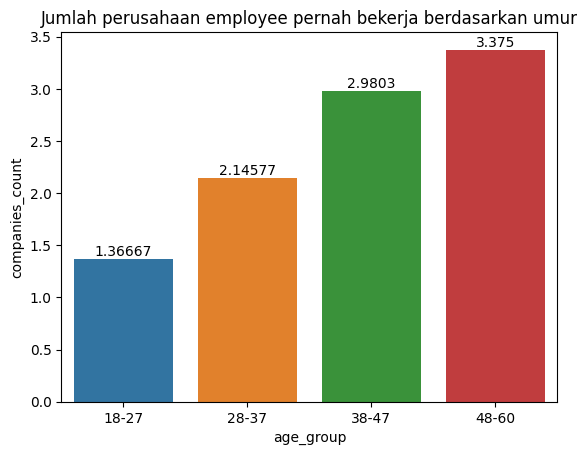

In [93]:
ax = sns.barplot(x=cleaned3['age_group'], y=cleaned3['companies_count'], errorbar=('ci', False),order=['18-27','28-37','38-47','48-60'])
plt.bar_label(ax.containers[0])
plt.title('Jumlah perusahaan employee pernah bekerja berdasarkan umur')
plt.show()

Berdasarkan visualisasi di atas, employee yang lebih berumur pernah bekerja di lebih banyak perusahaan. Pada employee yang berumur dalam rentang 48-60 tahun, rata-rata mereka sudah berpengalaman bekerja di 3 perusahaan. Sebaliknya, employee yang berumur 18-27 tahun sudah berpengalaman bekerja di 1 perusahaan. Oleh karena itu, employee yang lebih berumur ternyata lebih sering berpindah perusahaan.

### H. Bagaimana pengaruh satisfaction dan work life balance terhadap employee retention?

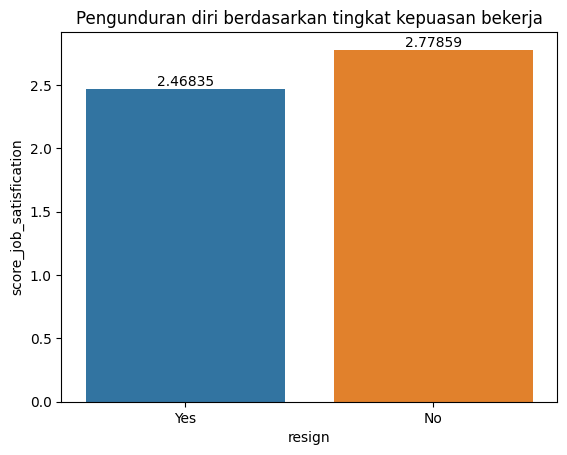

In [94]:
ax = sns.barplot(x=cleaned['resign'], y=cleaned['score_job_satisfication'], errorbar=('ci',False))
plt.bar_label(ax.containers[0])
plt.title('Pengunduran diri berdasarkan tingkat kepuasan bekerja')
plt.show()

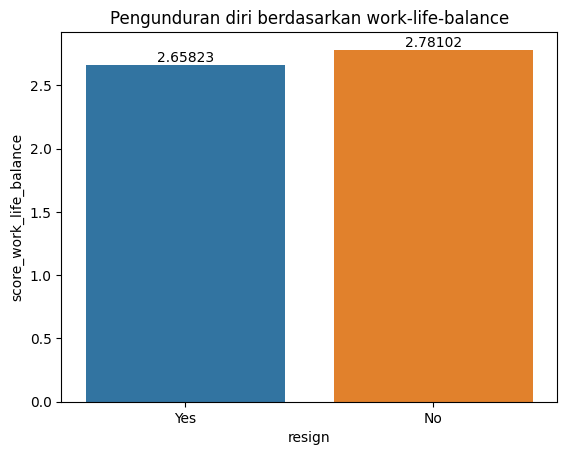

In [95]:
ax = sns.barplot(x=cleaned['resign'], y=cleaned['score_work_life_balance'], errorbar=('ci',False))
plt.bar_label(ax.containers[0])
plt.title('Pengunduran diri berdasarkan work-life-balance')
plt.show()

Pada visualisasi pertama, nilai job satisfication dari rata-rata employee yang resign dan yang tidak resign memiliki selisih yang tidak jauh berbeda. Meskipun begitu, rata-rata employee yang tidak resign cenderung cukup puas terhadap pekerjaannya. Rata-rata employee yang resign cenderung cukup tidak puas terhadap pekerjaannya. Pada visualisasi kedua, nilai work life balance dari rata-rata employee yang resign dan yang tidak resign memiliki selisih yang tidak jauh juga. Baik employee yang resign, maupun yang tidak resign memiliki nilai work life balance yang cukup bagus. Oleh karena itu, employee yang resign cenderung tidak puas terhadap pekerjaannya dan semua employee yang resign dan yang tidak resign cenderung dapat menyeimbangkan kehidupan sehari-hari mereka dengan pekerjaannya.

## Membuat Model

### A. Lakukan prediksi untuk mengetahui apakah karyawan akan resign atau tidak di perusahaan tersebut. Bagaimana hasil prediksi anda dapat membantu perusahaan dalam mengambil keputusan? (klasifikasi)

In [96]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

def evaluate_classifier_performance(prediction, y_test):
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

def cross_val(clf, param, X, y):
    cv = GridSearchCV(clf, param_grid=param, cv= kfold, verbose=3, scoring = 'accuracy')
    cv.fit(X, y)
    print(cv.best_params_)

### Preprocessing Data Awal 

Pada proses pembuatan model klasifikasi, hal pertama yang diperhatikan adalah jenis data yang terdapat pada input features dan output label. Berdasarkan pengamatan didapatkan bahwa terdapat 26 fitur dimana 6 di antaranya memiliki data yang bersifat nominal, sedangkan yang lain numerik kemudian data output label bersifat nominal juga dengan dua kelas (Yes / No). Oleh karena itu, dilakukan dua tahap preprocessing : 1) Data Encoding dan 2) Feature Selection 

Data Encoding 

Sebelum dilakukan modelling dilakukan preprocessing dengan mengubah kolom-kolom nominal menjadi nilai integer menggunakan encoder. 

In [97]:
# Melakukan copy dataframe untuk klasifikasi 
df_classification = cleaned.copy()

In [98]:
df_classification.columns

Index(['age', 'resign', 'division', 'home_distance', 'education',
       'score_environment', 'major', 'gender', 'hourly_rate',
       'score_contribution', 'job_rank', 'role', 'score_job_satisfication',
       'marriage_status', 'monthly_income', 'companies_count', 'over_time',
       'salary_increment_percentage', 'rate_performance',
       'score_work_relationahip', 'time_total_working',
       'last_year_training_time', 'score_work_life_balance',
       'time_current_company', 'time_current_role', 'time_last_promotion',
       'time_current_manager'],
      dtype='object')

In [99]:
# Fitur-fitur kategorikal 
categorical = ['division', 'major', 'gender', 'role', 
        'marriage_status', 'over_time', 'resign']

numerical = ['age', 'home_distance', 'education',
       'score_environment', 'hourly_rate',
       'score_contribution', 'job_rank', 'score_job_satisfication',
       'monthly_income', 'companies_count', 
       'salary_increment_percentage', 'rate_performance',
       'score_work_relationahip', 'time_total_working',
       'last_year_training_time', 'score_work_life_balance',
       'time_current_company', 'time_current_role', 'time_last_promotion',
       'time_current_manager']

In [100]:
#Melakukan encode pada fitur kategorikal
for col in categorical:
    df_classification[col] = LabelEncoder().fit_transform(df_classification[col])

Data encoding hanya dilakukan pada fitur kategorikal dengan alasan berikut: model yang akan digunakan untuk klasifikasi pada dasarnya dapat meng-handle bentuk data kategorikal (Random Forest dan Naive Bayes Classifier) kemudian kebutuhan encoding pada tahap ini untuk memudahkan pemilihan fitur pada deature selection. 

Feature Selection

Selanjutnya dilakukan pemilihan fitur (feature selection) menggunakan ANOVA yaitu dengan SelectKBest hal ini karena metode ini dapat mengakomodasi mixed data pada input features, terdapat pemilihan fitur dari 26 menjadi 15 dimana angka ini didapatkan dari proses iterasi yang menghasilkan model bekerja paling optimal dengan penggunaan 15 fitur.

In [101]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = df_classification.columns.drop('resign')

#Mendefinisikan dan menggunakan selector K Best dengan k = 15
selector = SelectKBest(f_classif, k=15) 
features = selector.fit_transform(df_classification[targets], df_classification['resign'])

#Printout 15 fitur yang paling berpengaruh terhadap output label 
selector.get_feature_names_out(input_features=selector.feature_names_in_)

array(['age', 'division', 'home_distance', 'score_environment', 'major',
       'score_contribution', 'job_rank', 'score_job_satisfication',
       'marriage_status', 'monthly_income', 'over_time',
       'time_total_working', 'time_current_company', 'time_current_role',
       'time_current_manager'], dtype=object)

In [102]:
chosen_features = ['age', 'division', 'home_distance', 'score_environment', 'major',
       'score_contribution', 'job_rank', 'score_job_satisfication',
       'marriage_status', 'monthly_income', 'over_time',
       'time_total_working', 'time_current_company', 'time_current_role',
       'time_current_manager']

# Mendefinisikan X sebagai array input
X = df_classification[chosen_features].to_numpy()

#Mendefinisikan Y sebagai array output
y = df_classification['resign'].values

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [104]:
# Menghitung jumlah data pada dataset
counter_y = Counter(y)
print(counter_y)

Counter({0: 1233, 1: 237})


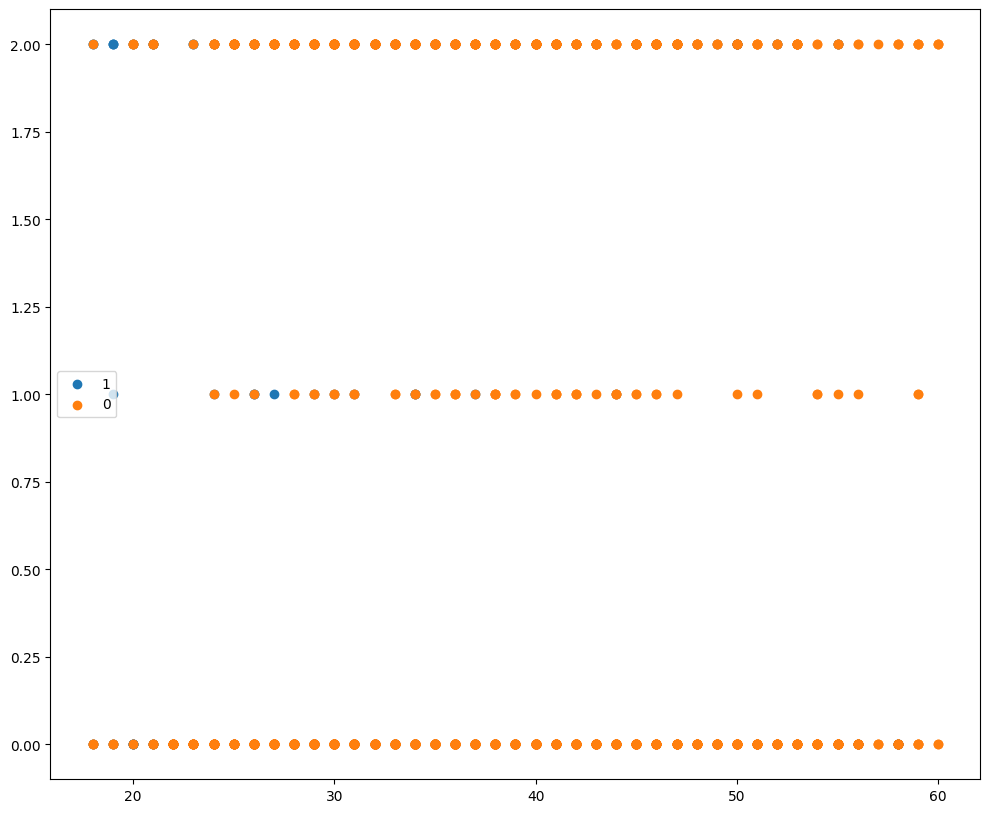

In [105]:
# Menampilkan scatter plot pada salah satu column
plt.figure(figsize=(12, 10))

for label, _ in counter_y.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    plt.legend()
plt.show()

Berdasarkan pengamatan, di dapatkan bahwa terdapat imbalanced class pada dataset dengan perbandingan sekitar 1 : 6. Oleh karena itu langkah selanjutnya adalah melakukan oversampling dan undersampling pada dataset yang bertujuan untuk meningkatkan performa dan learning rate dari model. Namun demikian, untuk menghindari data leaked dari proses ini kami akan memasukkan oversampling dan undersampling ke dalam pipeline modelling sehingga proses dibawah ini hanya bertujuan untuk menunjukkan visualisasi. 

### Oversampling

Metode oversampling yang preferable sebetulnya adalah Random Oversampling, hal ini karena input features yang bersifat mixed (terdapat data nominal maupun numerik). Apabila oversample dilakukan menggunakan metode seperti SMOTE, maka ditakutkan data baru yang dibuat berdasarkan metode nearest neighbor atau perhitungan jarak akan membuat data-data baru tersebut kurang akurat untuk digunakan dalam proses berikutnya. Namun setelah melakukan proses modelling kami mendapatkan evalusi bahwa hasil pada oversampling dengan SMOTE memberikan metrics yang lebih baik.

Random Oversampling

In [106]:
# mendefinisikan strategi oversampling
from imblearn.over_sampling import RandomOverSampler
randomSample = RandomOverSampler(sampling_strategy='minority')

# fit dan transofrm (resample) dataset 
X_train_over, y_train_over = randomSample.fit_resample(X_train, y_train)

In [107]:
# Menghitung distribusi kelas 
counter_y_train_over = Counter(y_train_over)
print(counter_y_train_over)

Counter({0: 1048, 1: 1048})


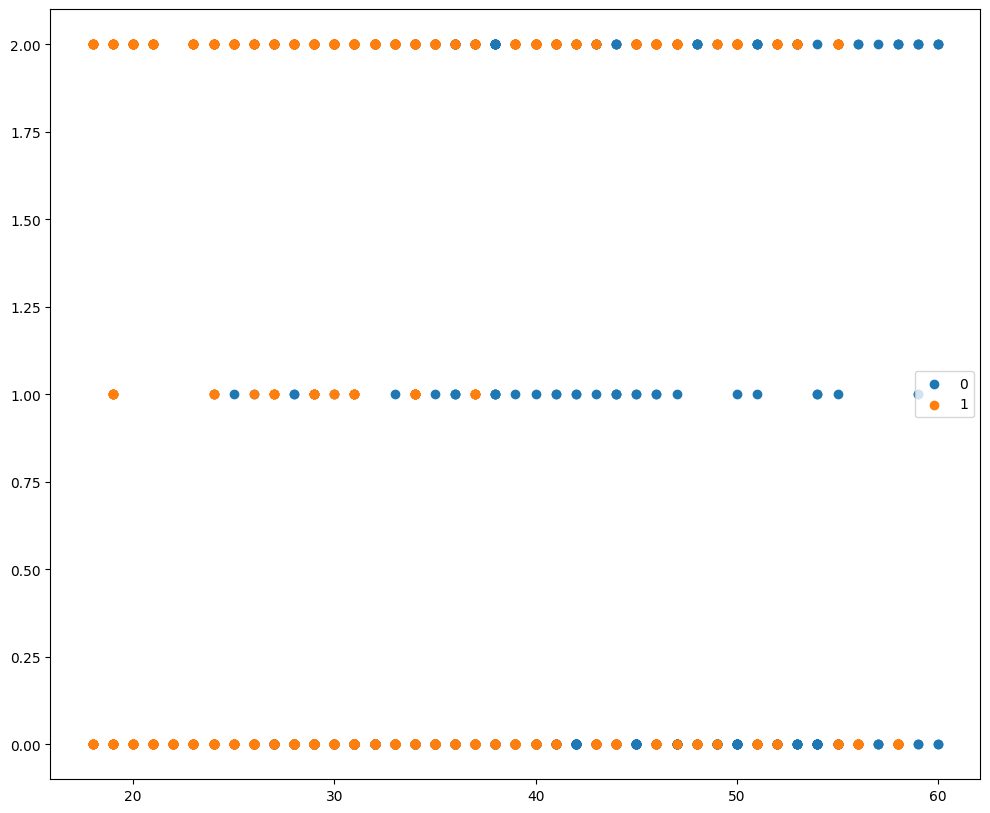

In [108]:
# Menampilkan scatter plot pada salah satu column
plt.figure(figsize=(12, 10))

for label, _ in counter_y_train_over.items():
    row_ix = where(y_train_over == label)[0]
    plt.scatter(X_train_over[row_ix, 0], X_train_over[row_ix, 1], label=str(label))
    plt.legend()
plt.show()

Berdasarkan perhitungan distribusi, kelas 1 (Yes) sudah meningkat jumlahnya menjadi setara dengan kelas 0 (No). Bentuk scatter plot yang didapatkan dari hasil oversampling tetap sama hal ini karena metode random oversampling hanya melakukan duplikasi data secara random (bukan membentuk data baru). 

In [109]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN

smote = SMOTE()

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
counter_y_train_over = Counter(y_train_over)
print(counter_y_train_over)

Counter({0: 1048, 1: 1048})


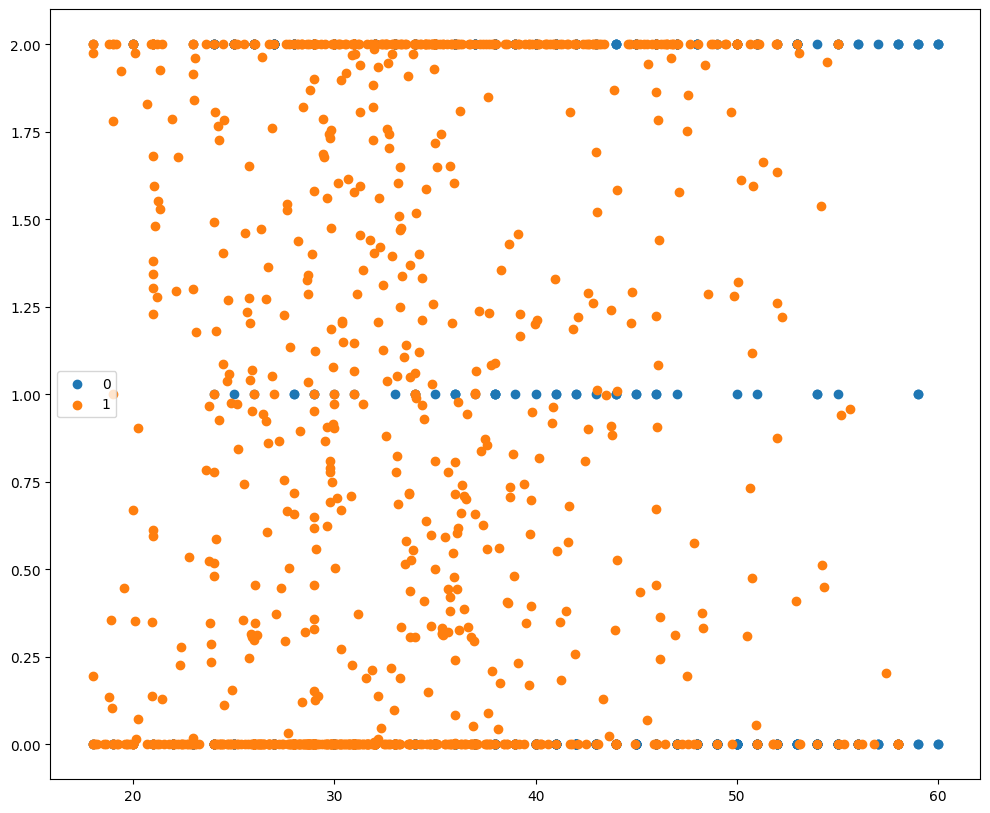

In [110]:
# Menampilkan scatter plot pada salah satu column
plt.figure(figsize=(12, 10))

for label, _ in counter_y_train_over.items():
    row_ix = where(y_train_over == label)[0]
    plt.scatter(X_train_over[row_ix, 0], X_train_over[row_ix, 1], label=str(label))
    plt.legend()
plt.show()

Bentuk scatter plot yang didapatkan dari hasil oversampling lebih variatif dibandingkan sebelumnya karena algoritma SMOTE melakukan proses pembuatan data baru (tidak hanya duplikasi data). 

### Undersampling

Metode Random Undersampling dalam kasus ini lebih preferable dengan alasan yang sama dengan pemilihan metode oversampling, yaitu karena metode lain relatif sensitif terhadap jarak sehingga dinilai dapat menurunkan akurasi data baru yang dibuat. Namun demikian kami tetap akan menampilkan scatterplot untuk metode lain yaitu NearMiss2. 

Random Undersampling

In [111]:
from imblearn.under_sampling import RandomUnderSampler

# mendefinisikan strategi oversampling
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit dan transofrm (resample) dataset 
X_train_undersample, y_train_undersample = undersample.fit_resample(X_train, y_train)

In [112]:
# Menghitung distribusi kelas 
counter_y_train_undersample = Counter(y_train_undersample)
print(counter_y_train_undersample)

Counter({0: 201, 1: 201})


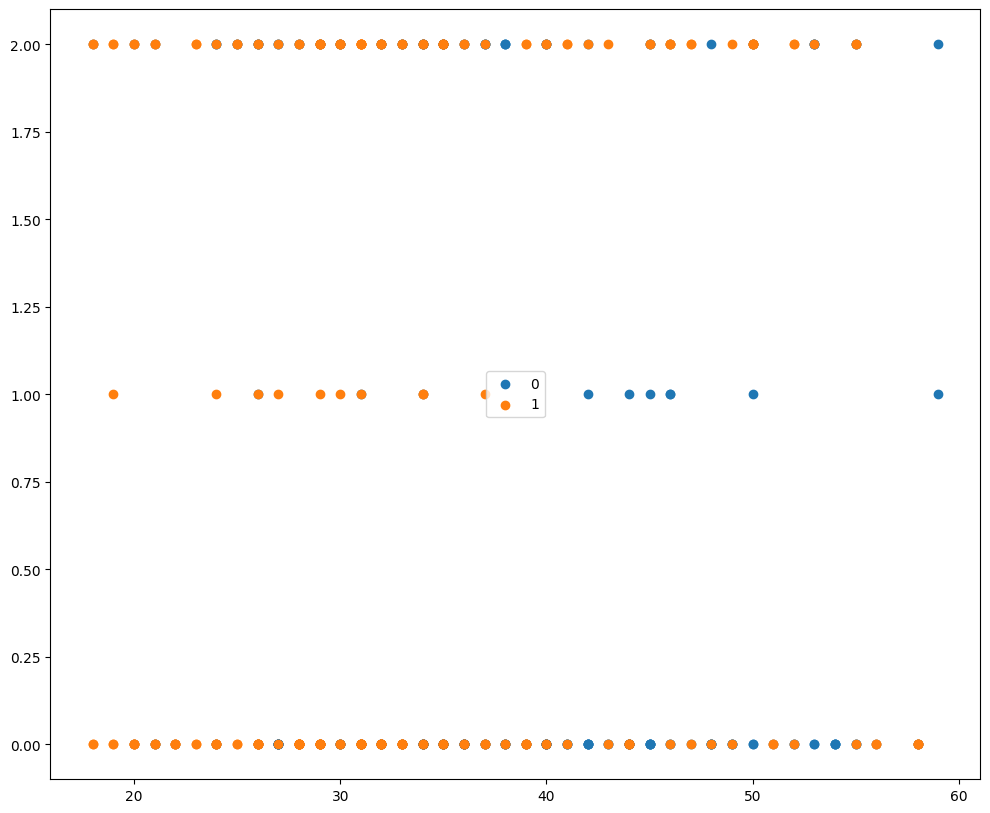

In [113]:
# Menampilkan scatter plot pada salah satu column
plt.figure(figsize=(12, 10))

for label, _ in counter_y_train_undersample.items():
    row_ix = where(y_train_undersample == label)[0]
    plt.scatter(X_train_undersample[row_ix, 0],
                   X_train_undersample[row_ix, 1], label=str(label))
    plt.legend()
plt.show()


Dapat terlihat dari perhitungan distribusi bahwa nilai kedua kelas sudah balance dimana nilai kelas 0 (No) menurun menjadi 233 (jumlah yang sama dengan kelas 1) sehingga dapat dikatakan data sudah berhasil di undersampling. 

In [114]:
from imblearn.under_sampling import NearMiss

# fit and apply the transform
nearmiss2 = NearMiss(version=2)

In [115]:
X_train_undersample, y_train_undersample = nearmiss2.fit_resample(X_train, y_train)

# Menghitung distribusi kelas 
counter_y_train_undersample = Counter(y_train_undersample)
print(counter_y_train_undersample)

Counter({0: 201, 1: 201})


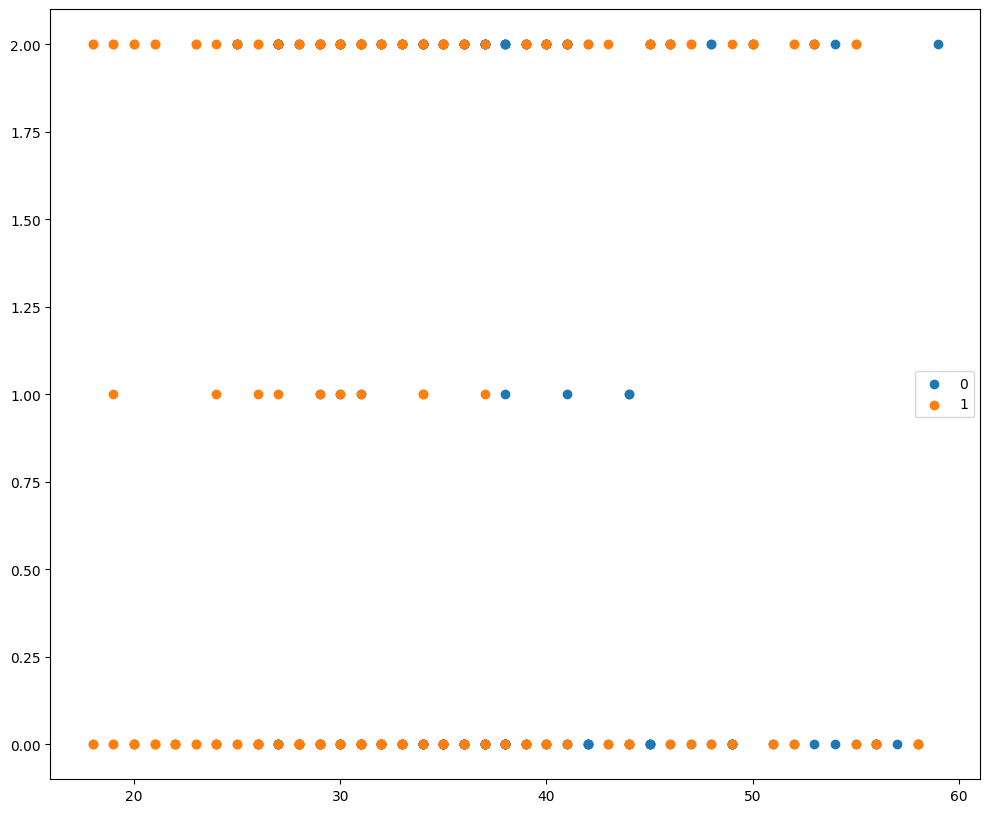

In [116]:
# Menampilkan scatter plot pada salah satu column
plt.figure(figsize=(12, 10))

for label, _ in counter_y_train_undersample.items():
    row_ix = where(y_train_undersample == label)[0]
    plt.scatter(X_train_undersample[row_ix, 0],
                   X_train_undersample[row_ix, 1], label=str(label))
    plt.legend()
plt.show()

### Applied StratifiedKFold CV

In [117]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

def cross_val(clf, param, X, y):
    cv = GridSearchCV(clf, param_grid=param, cv= kfold, verbose=3, scoring = 'accuracy')
    cv.fit(X, y)
    print(cv.best_params_)

In [118]:
cnt = 1
for train_index, test_index in kfold.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 999, Test set:250
Fold:2, Train set: 999, Test set:250
Fold:3, Train set: 999, Test set:250
Fold:4, Train set: 999, Test set:250
Fold:5, Train set: 1000, Test set:249


### Modelling 

Pengantar

Pada proses modelling terdapat beberapa hal yang perlu dilakukan : 

1. Oversampling atau undersampling, karena dataset yang dimiliki cukup imbalanced

undefined. Train dan Test Split untuk membagi dataset menjadi training sekaligus testing set

undefined. Cross Validation dan Hyperparameter Tuning untuk melatih model sekaligus memilih model dengan parameter yang paling optimal

Terdapat beberapa kemungkinan data leaked (kebocoran data, atau data pada testing set sudah dipelajari oleh model pada saat training) sehingga model akan overfit. Kemungkinan data leaked ini sendiri kami identifikasi dapat terjadi setidaknya pada dua proses, yaitu: 

1. Jika proses oversampling / undersampling dilakukan sebelum train-test split, maka ada kemungkinan data yang terduplikasi pada proses oversampling terbagi di training sekaligus testing set. Sehingga data testing leaked ke dalam proses training yang akan menyebabkan model overfit. Oleh karena itu, oversampling / undersampling harus dilakukan hanya pada training set (dilakukan setelah splitting). 

undefined. Jika proses Cross Validation dilakukan setelah keseluruhan training set di-oversampling, maka akan terjadi proses yang mirip dengan nomor 1 di cross validation pada training set, dimana data sudah terduplikasi lebih dulu sebelum pembagian fold (jika menggunakan kfold) sehingga akan ada kemungkinan duplikasi data  yang terbagi pada training dan testing set atau data leaked. Hal ini akan mengakibatkan performa pada training tidak sesuai dengan performa pada evaluasi testing (performa akan menurun) sehingga evaluasi model juga tidak optimal. Untuk menghindari permasalahan ini maka proses over / undersampling dilakukan pada training set setiap fold dengan menerapkan pipeline.

Pemilihan Model 

Pada proses ini kami melakukan klasifikasi menggunakan dua model, yaitu Random Forest dan Naive Bayes Classifier dengan menerapkan baik oversampling maupun undersampling. Pemilihan kedua model ini didasarkan pada input data yang bersifat mixed (terdapat data kategorikal dan data numerikal) dimana data kategorikal disini bersifat nominal sehingga kami menilai algoritma model yang melibatkan perhitungan kuantitatif seperti jarak ataupun varian dapat membuat model jadi tidak optimal. Oleh karena itu, kami memilih Random Forest dan Naive Bayes karena keduanya dapat mengakomodasi perhitungan untuk data yang nominal dan memiliki algoritma yang tree-based dan probabilitas. 

Penentuan Metrik

Pada kasus ini, kami mengidentifikasi bahwa metrik yang paling utama adalah untuk menilai apakah seseorang akan resign atau dalam klasifikasi maka memberikan prediksi "resign = Yes" pada ground truth "Yes". Oleh karena itu, kami beranggapan bahwa metrik penilaian yang paling penting untuk mengevaluasi model adalah recall diikuti dengan akurasi. 

### Random Forest Classifier

Pada model ini akan dilakukan modelling untuk naive random forest (tanpa sampling, hyperparameter tuning, ataupun cross validation) selanjutnya akan dilakukan modelling untuk random forest dengan oversampling (Random, SMOTE) dan undersampling (Random, Nearmiss2) serta hyperparameter tuning dan cross validation. 

Naive Random Forest 

In [119]:
rf_naive = RandomForestClassifier(random_state=42, n_jobs=6)
rf_naive.fit(X_train, y_train)

RandomForestClassifier(n_jobs=6, random_state=42)

In [120]:
y_test_predict = rf_naive.predict(X_test)
evaluate_classifier_performance(y_test_predict, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       185
           1       0.56      0.25      0.35        36

    accuracy                           0.85       221
   macro avg       0.72      0.61      0.63       221
weighted avg       0.82      0.85      0.82       221



Confusion Matrix



prediction,0,1
actual,,
0,178,7
1,27,9




F1 Macro Average: 0.6294871794871795
F1 Micro Average: 0.8461538461538461
Precision Macro Average: 0.7153963414634146
Precision Micro Average: 0.8461538461538461
Recall Macro Average: 0.606081081081081
Recall Micro Average: 0.8461538461538461



Oversample Random Forest - Random Oversampling

In [121]:
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline

params = {
        'n_estimators' : [150, 200],
        'max_depth' : [None, 1, 3],
        'min_samples_leaf': [1, 3],
        'min_samples_split': [2, 7, 10]
    }

imba_pipeline = make_pipeline(RandomOverSampler(sampling_strategy='minority', random_state=42), 
                              RandomForestClassifier(n_estimators=100, random_state=42))
cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kfold)

new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kfold, scoring='recall',
                        return_train_score=True)
grid_imba.fit(X_train, y_train);

In [122]:
grid_imba.best_params_

{'randomforestclassifier__max_depth': 3,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 150}

In [123]:
grid_imba.best_score_

0.5663414634146342

In [124]:
y_test_predict = grid_imba.predict(X_test)
evaluate_classifier_performance(y_test_predict, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       185
           1       0.40      0.67      0.50        36

    accuracy                           0.78       221
   macro avg       0.66      0.74      0.68       221
weighted avg       0.84      0.78      0.80       221



Confusion Matrix



prediction,0,1
actual,,
0,149,36
1,12,24




F1 Macro Average: 0.6806358381502889
F1 Micro Average: 0.7828054298642534
Precision Macro Average: 0.6627329192546584
Precision Micro Average: 0.7828054298642534
Recall Macro Average: 0.7360360360360361
Recall Micro Average: 0.7828054298642534



Oversample Random Forest - SMOTE

In [125]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), RandomForestClassifier(n_estimators=100, random_state=42))
cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kfold)

grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kfold, scoring='recall',
                        return_train_score=True)
grid_imba.fit(X_train, y_train);

In [126]:
grid_imba.best_params_

{'randomforestclassifier__max_depth': 1,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 200}

In [127]:
grid_imba.best_score_

0.5917073170731706

In [128]:
y_test_predict = grid_imba.predict(X_test)
evaluate_classifier_performance(y_test_predict, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       185
           1       0.43      0.61      0.51        36

    accuracy                           0.81       221
   macro avg       0.67      0.73      0.69       221
weighted avg       0.84      0.81      0.82       221



Confusion Matrix



prediction,0,1
actual,,
0,156,29
1,14,22




F1 Macro Average: 0.6923101829367007
F1 Micro Average: 0.8054298642533937
Precision Macro Average: 0.6745098039215687
Precision Micro Average: 0.8054298642533937
Recall Macro Average: 0.7271771771771772
Recall Micro Average: 0.8054298642533937



Undersample Random Forest - Random Undersampling

In [129]:
imba_pipeline = make_pipeline(RandomUnderSampler(sampling_strategy='majority', random_state=42), RandomForestClassifier(n_estimators=100, random_state=42))
cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kfold)

grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kfold, scoring='recall',
                        return_train_score=True)
grid_imba.fit(X_train, y_train);

In [130]:
grid_imba.best_params_

{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 150}

In [131]:
grid_imba.best_score_

0.7060975609756097

In [132]:
y_test_predict = grid_imba.predict(X_test)
evaluate_classifier_performance(y_test_predict, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       185
           1       0.35      0.69      0.46        36

    accuracy                           0.74       221
   macro avg       0.64      0.72      0.64       221
weighted avg       0.83      0.74      0.77       221



Confusion Matrix



prediction,0,1
actual,,
0,138,47
1,11,25




F1 Macro Average: 0.6446551341760922
F1 Micro Average: 0.7375565610859729
Precision Macro Average: 0.6366983594332587
Precision Micro Average: 0.7375565610859729
Recall Macro Average: 0.7201951951951953
Recall Micro Average: 0.7375565610859729



Undersample Random Forest - NearMiss2

In [133]:
imba_pipeline = make_pipeline( NearMiss(version=2), RandomForestClassifier(n_estimators=100, random_state=42))
cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kfold)

grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kfold, scoring='recall',
                        return_train_score=True)
grid_imba.fit(X_train, y_train);

In [134]:
grid_imba.best_params_

{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 7,
 'randomforestclassifier__n_estimators': 200}

In [135]:
grid_imba.best_score_

0.8753658536585366

In [136]:
y_test_predict = grid_imba.predict(X_test)
evaluate_classifier_performance(y_test_predict, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.86      0.17      0.28       185
           1       0.17      0.86      0.28        36

    accuracy                           0.28       221
   macro avg       0.51      0.51      0.28       221
weighted avg       0.75      0.28      0.28       221



Confusion Matrix



prediction,0,1
actual,,
0,31,154
1,5,31




F1 Macro Average: 0.28054298642533937
F1 Micro Average: 0.28054298642533937
Precision Macro Average: 0.5143393393393394
Precision Micro Average: 0.28054298642533937
Recall Macro Average: 0.5143393393393394
Recall Micro Average: 0.28054298642533937



### Naive Bayes

Model NaiveBayes yang dipilih adalah Bernoulli Naive Bayes karena label dataset hanya memiliki dua nilai unik (binary). Model yang dilatih adalah model NB tanpa cross validation dan sampling, kemudian model NB dengan cross validation dan oversampling serta undersampling paling optimal (SMOTE, Random Under Sampling).  

Naive - Naive Bayes

In [137]:
nb = BernoulliNB()
nb.fit(X_train, y_train)

BernoulliNB()

In [138]:
y_test_predict = nb.predict(X_test)
evaluate_classifier_performance(y_test_predict, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       185
           1       0.33      0.17      0.22        36

    accuracy                           0.81       221
   macro avg       0.59      0.55      0.56       221
weighted avg       0.77      0.81      0.78       221



Confusion Matrix



prediction,0,1
actual,,
0,173,12
1,30,6




F1 Macro Average: 0.556987399770905
F1 Micro Average: 0.8099547511312217
Precision Macro Average: 0.5927750410509031
Precision Micro Average: 0.8099547511312217
Recall Macro Average: 0.5509009009009009
Recall Micro Average: 0.8099547511312217



Oversample Naive Bayes - SMOTE

In [139]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), nb)
cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kfold)

imba_pipeline.fit(X_train, y_train);

In [140]:
y_test_predict = imba_pipeline.predict(X_test)
evaluate_classifier_performance(y_test_predict, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       185
           1       0.43      0.56      0.49        36

    accuracy                           0.81       221
   macro avg       0.67      0.71      0.69       221
weighted avg       0.83      0.81      0.82       221



Confusion Matrix



prediction,0,1
actual,,
0,159,26
1,16,20




F1 Macro Average: 0.6855691056910569
F1 Micro Average: 0.8099547511312217
Precision Macro Average: 0.6716770186335403
Precision Micro Average: 0.8099547511312217
Recall Macro Average: 0.7075075075075075
Recall Micro Average: 0.8099547511312217



Undersample Naive Bayes - Random Undersampling 

In [141]:
imba_pipeline = make_pipeline(RandomUnderSampler(sampling_strategy='majority', random_state=42), nb)
cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kfold)

imba_pipeline.fit(X_train, y_train);

In [142]:
y_test_predict = imba_pipeline.predict(X_test)
evaluate_classifier_performance(y_test_predict, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       185
           1       0.32      0.69      0.43        36

    accuracy                           0.71       221
   macro avg       0.62      0.70      0.62       221
weighted avg       0.82      0.71      0.74       221



Confusion Matrix



prediction,0,1
actual,,
0,131,54
1,11,25




F1 Macro Average: 0.6180029251429331
F1 Micro Average: 0.7058823529411765
Precision Macro Average: 0.6194954537350686
Precision Micro Average: 0.7058823529411765
Recall Macro Average: 0.7012762762762763
Recall Micro Average: 0.7058823529411765



### Kesimpulan

Berdasarkan hasil evaluasi, terdapat tiga model dengan nilai recall dan akurasi paling tinggi yaitu: SMOTE Random Forest, RandomOverSampling Random Forest, dan RandomUnderSampling Naive Bayes. Namun dengan memperhatikan prediksi pada confusion matrix juga, kami menilai model paling baik adalah SMOTE Random Forest dengan akurasi 0.81 dan recall 0.73. Justifikasi yang dapat diberikan karena penggunaan SMOTE untuk over sampling adalah kemungkinan SMOTE dapat tetap optimal karena fitur yang bersifat nominal hanya 3 dari 15 fitur yang digunakan. Kami menilai model ini tetap reliable karena evaluasi dilakukan pada testing set original (tanpa adanya oversampling ataupun undersampling pada set tersebut). 

Selanjutnya model ini dapat digunakan oleh pihak HR untuk memprediksi apakah karyawan akan melakukan resign atau tidak di tahun-tahun berikutnya sehingga ini akan dapat membantu HR memprediksikan ketersediaan sumber daya manusia, pengetahuan, dan kemampuan di perusahaan. Selain itu karena pada model ini digunakan seleksi fitur, maka HR dapat lebih memperhatikan fitur-fitur (atau pada dunia nyata komponen) yang berperan penting dalam pengunduran diri karyawan sehingga dapat membuat keputusan yang bisa menurunkan tingkat pengunduran diri karyawan. 

### B. Lakukan prediksi untuk mengetahui berapa lama seorang karyawan akan bertahan di perusahaan tersebut. Bagaimana hasil prediksi anda dapat membantu perusahaan dalam mengambil keputusan? (regresi)

Untuk permasalahan ini kami menggunakan model regresi, dengan target yaitu time_current_company. Namun, pertama kali kita harus memisahkan data yang resign dengan tidak, karena untuk model kali ini kita hanya akan menggunakan data dari yang resign saja.

- Memilih Data yang Digunakan

In [143]:
resign_data = cleaned[cleaned["resign"] >= 'Yes']
resign_data = resign_data.drop("resign",axis=1)

total_rows, total_attributes = resign_data.shape

print('Jumlah data resign:', total_rows)
print("Jumlah atribut:", total_attributes)

Jumlah data resign: 237
Jumlah atribut: 26


- Matriks korelasi berdasarkan data resign saja

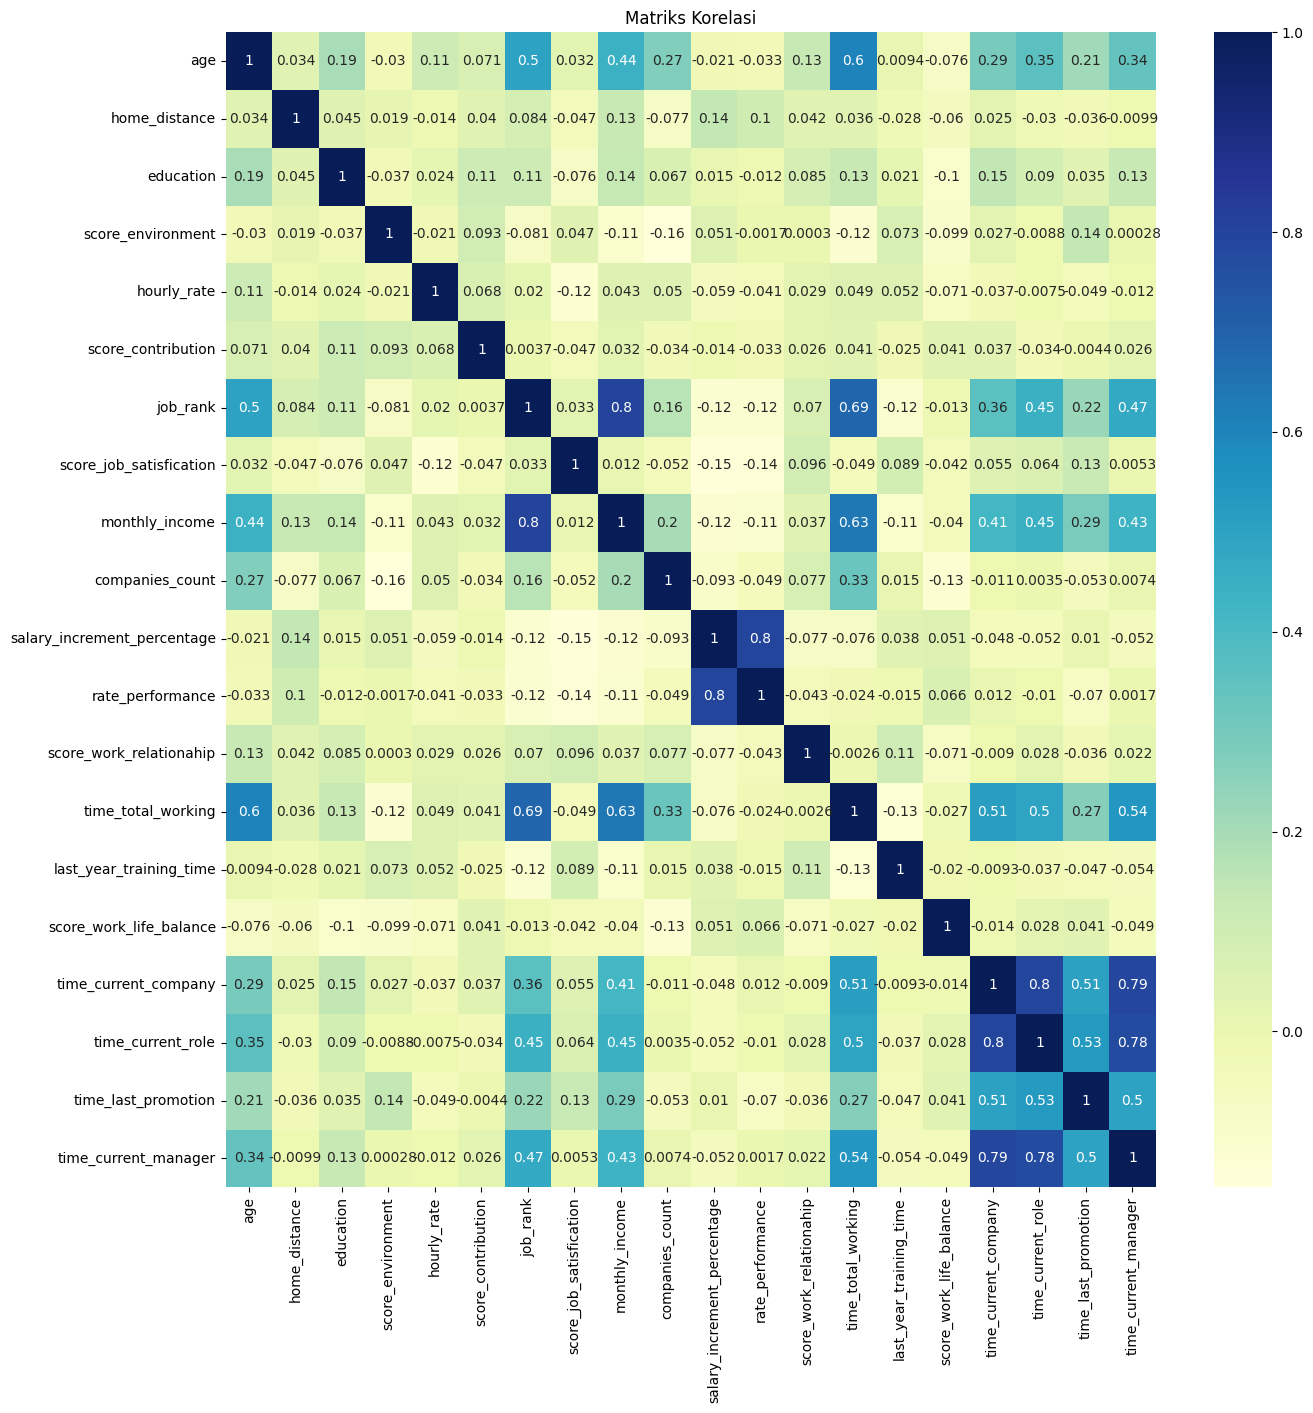

In [144]:
plt.figure(figsize=(15,15))
cor = resign_data.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.title("Matriks Korelasi")
plt.show()

- Memisahkan X dan y sekaligus membaginya dalam train & test

Fitur dipilih berdasarkan nilai korelasi yang tinggi (diatas 0,1) dengan target (time_current_company) yang mana terpilih 8 fitur yaitu: age, education, job_rank, monthly_income, time_total_working, time_current_role, time_last_promotion, dan time_currenct_manager.

In [145]:
X_regresi = resign_data[["age", "education", "job_rank", "monthly_income", "time_total_working", "time_current_role", "time_last_promotion", "time_current_manager"]]
y_regresi = resign_data["time_current_company"]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regresi, y_regresi, test_size = 0.15,random_state = 123)

- Melakukan seleksi fitur lanjutan dengan Lasso model

Model lasso adalah model yang dapat digunakan sebagai embedded feature selection, maka dari itu kami menggunakan model ini untuk menyeleksi fitur lebih lanjut dan juga melihat bagaimana kinerja dari model lasso itu sendiri.

1. Melakukan standarisasi untuk fitur yang digunakan

In [146]:
scaler = MinMaxScaler()
X_train_lasso = scaler.fit_transform(X_train_reg)
X_test_lasso = scaler.transform(X_test_reg) 

2. Mencari alpha terbaik untuk lasso

In [147]:
alphaL = [0.1,0.2,0.3,0.4,0.5]
modelL = []
for i in alphaL:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train_lasso, y_train_reg)
    modelL.append(lasso)
    
modelL

[Lasso(alpha=0.1),
 Lasso(alpha=0.2),
 Lasso(alpha=0.3),
 Lasso(alpha=0.4),
 Lasso(alpha=0.5)]

In [148]:
idx = 0
for i in alphaL:
    y_pred_l = modelL[idx].predict(X_test_lasso)
    idx += 1
    metrics_reg(y_test_reg,y_pred_l)
    print('-----------------------------------------')

MAE: 1.1510333068909815
MSE: 2.068719307361208
RMSE: 1.4383043166733553
R_squared: 0.7665191829365039
-----------------------------------------
MAE: 1.41063516105346
MSE: 2.762020572293764
RMSE: 1.6619327821225995
R_squared: 0.6882714742059812
-----------------------------------------
MAE: 1.723608124498138
MSE: 3.8804721777490787
RMSE: 1.9698914126796632
R_squared: 0.5620402384078371
-----------------------------------------
MAE: 2.0664527791104734
MSE: 5.407962020551781
RMSE: 2.3255025307558324
R_squared: 0.38964392766392864
-----------------------------------------
MAE: 2.410458313668719
MSE: 7.347399201134404
RMSE: 2.7106086403489535
R_squared: 0.170754213648856
-----------------------------------------


Dari hasil tersebut ditemukan alpha 0.1 yang terbaik dengan R Squared terbesar dan error terkecil

3. Membuat model lasso dan mencari koefisiennya

In [149]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_lasso, y_train_reg)

Lasso(alpha=0.1)

In [150]:
print("Koefisien persamaan linear dengan lasso: \n", lasso.coef_)
print("Intersep persamaan linear dengan lasso: \n", lasso.intercept_)

Koefisien persamaan linear dengan lasso: 
 [0.         0.         0.         0.         0.0599684  6.44027158
 0.53362321 5.70243716]
Intersep persamaan linear dengan lasso: 
 1.7428820535740464


Dari koefisien lasso di atas ditemukan ada koefiesien regresi yang bernilai 0, yang menandakan bahwa untuk fitur tersebut (dalam hal ini age, education, job_rank, dan monthly_income) tidak memiliki hubungan linear dengan target. Oleh karena itu untuk komparasi kami membuang 4 fitur tersebut lalu mencobanya dengan model lain (linear model & random forest)

In [151]:
X_train_reg_clean = X_train_reg[["time_total_working", "time_current_role", "time_last_promotion", "time_current_manager"]]
X_test_reg_clean = X_test_reg[["time_total_working", "time_current_role", "time_last_promotion", "time_current_manager"]]

- Linear Model

1. Membuat train & test baru (yang di-normalisasi)

In [152]:
X_train_lin = scaler.fit_transform(X_train_reg_clean)
X_test_lin = scaler.transform(X_test_reg_clean)

2. Train model

In [153]:
linear = LinearRegression()
linear.fit(X_train_lin, y_train_reg)
print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)

Koefisien persamaan linear: 
 [1.26919924 7.47490604 1.03472892 5.91748247]
Intersep persamaan linear: 
 1.0097808973436515


Mengingat model Random Forest merupakan model yang menerapkan bootstraping yang mana itu bisa menjadi bahan untuk seleksi fitur juga, maka dari itu kami mencoba 3 model random forest yaitu random forest 4 fitur (berdasarkan seleksi fitur korelasi + lasso), random forest 8 fitur (berdasarkan seleksi fitur korelasi saja), dan random forest 25 fitur (seluruh fitur selain target).

- Random Forest 4 Fitur

In [154]:
rf = RandomForestRegressor(random_state=123)

param_grid = {'n_estimators': [100,200,300],
               'min_samples_split': [5,15,30],
               'max_depth' : [5,10,15, None]}

clf = GridSearchCV(estimator= rf, 
                   param_grid=param_grid, cv= 3)

Train dengan best params dari hasil grid search

In [155]:
clf.fit(X_train_reg_clean, y_train_reg)
print(clf.best_params_)
rf_best = RandomForestRegressor(**clf.best_params_,random_state=123)
rf_best.fit(X_train_reg_clean, y_train_reg)

{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 300}


RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=300,
                      random_state=123)

- Random Forest 8 Fitur

Train dengan best params dari hasil grid search

In [156]:
clf.fit(X_train_reg, y_train_reg)
print(clf.best_params_)
rf_corr_best = RandomForestRegressor(**clf.best_params_,random_state=123)
rf_corr_best.fit(X_train_reg, y_train_reg)

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}


RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=300,
                      random_state=123)

- Random Forest 25 Fitur

1. Membuat train test baru dengan fitur seluruh fitur selain target

In [157]:
X_res = resign_data.drop("time_current_company", axis=1)
y_res = resign_data["time_current_company"]

X_res.shape

(237, 25)

2. Melakukan encoding untuk fitur-fitur kategorikal

In [158]:
kategorik = ['gender','over_time','division', 'major', 'marriage_status', 'role']
encoder = preprocessing.LabelEncoder()

for column in kategorik:
  encoder.fit(X_res[column])
  X_res[column] = encoder.transform(X_res[column])

3. Membagi train dan test data

In [159]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size = 0.15,random_state = 123)

4. Train dengan best params dari hasil grid search

In [160]:
clf.fit(X_train_res, y_train_res)
print(clf.best_params_)
rf_all_best = RandomForestRegressor(**clf.best_params_,random_state=123)
rf_all_best.fit(X_train_res, y_train_res)

{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}


RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=200,
                      random_state=123)

- Evaluasi Model

In [161]:
y_lasso_pred = lasso.predict(X_test_lasso)
y_lin_pred = linear.predict(X_test_lin)
y_rf_pred = rf_best.predict(X_test_reg_clean)
y_rf_corr_pred = rf_corr_best.predict(X_test_reg)
y_rf_all_pred = rf_all_best.predict(X_test_res)

1. Metrics Evaluasi Lasso Model

In [162]:
metrics_reg(y_test_reg,y_lasso_pred)

MAE: 1.1510333068909815
MSE: 2.068719307361208
RMSE: 1.4383043166733553
R_squared: 0.7665191829365039


2. Metrics Evaluasi Linear Model

In [163]:
metrics_reg(y_test_reg,y_lin_pred)

MAE: 0.9308236046652036
MSE: 1.8004099118765842
RMSE: 1.3417935429404124
R_squared: 0.7968012500398804


3. Metrics Evaluasi Random Forest 4 Fitur

In [164]:
metrics_reg(y_test_reg,y_rf_pred)

MAE: 0.663948230300438
MSE: 1.3842502481889296
RMSE: 1.176541647451942
R_squared: 0.8437700669117083


4. Metrics Evaluasi Random Forest 8 Fitur

In [165]:
metrics_reg(y_test_reg,y_rf_corr_pred)

MAE: 0.6651216431154634
MSE: 1.0685360470863803
RMSE: 1.0337001727224293
R_squared: 0.8794023585279153


5. Metrics Evaluasi Random Forest 25 Fitur

In [166]:
metrics_reg(y_test_res,y_rf_all_pred)

MAE: 0.6593147446689112
MSE: 0.9355195235441661
RMSE: 0.9672225822137147
R_squared: 0.8944149349026178


- Kesimpulan dan Analisis

Catatan: Untuk mempercepat saat run notebook ini, ada beberapa model yang sebenarnya dicoba namun tidak kami masukan pada notebook ini, diantaranya ridge, linear model (8 fitur), dan Random Forest (23 fitur / pengurangan dari yang 25 fitur). 

Berdasarkan diskusi kami model terbaik untuk permasalahan ini adalah model random forest yang menggunakan 8 fitur. Meskipun apabila kita lihat dari nilai evaluasinya (R_Squared dan error) sebenarnya model terbaik adalah ketika random forest dengan 25 fitur, namun apabila kita lihat nilai R_Squared antara 25 fitur dengan 8 fitur itu hanya selisih kecil sekali, yang bila kita interpretasikan selain 8 fitur tersebut 17 fitur lainnya tidak terlalu berpengaruh pada hasil regresi, padahal dengan pengurangan 17 fitur ini kita dapat menghemat waktu komputasi, sehingga kami memilih model random forest dengan 8 fitur tersebut menjadi model terbaik.

- Gambaran Prediksi dari Final Model

In [167]:
final = pd.DataFrame({'Actual': y_test_reg.values.flatten(), 'Predicted': y_rf_corr_pred.flatten() })
final

,Actual,Predicted
0,1.0,0.744416
1,7.0,8.098601
2,2.0,3.020854
3,2.0,2.049223
4,1.0,1.002373
5,0.0,0.724330
6,2.0,2.071962
7,2.0,2.486872
8,1.0,0.643485
9,7.0,7.608580


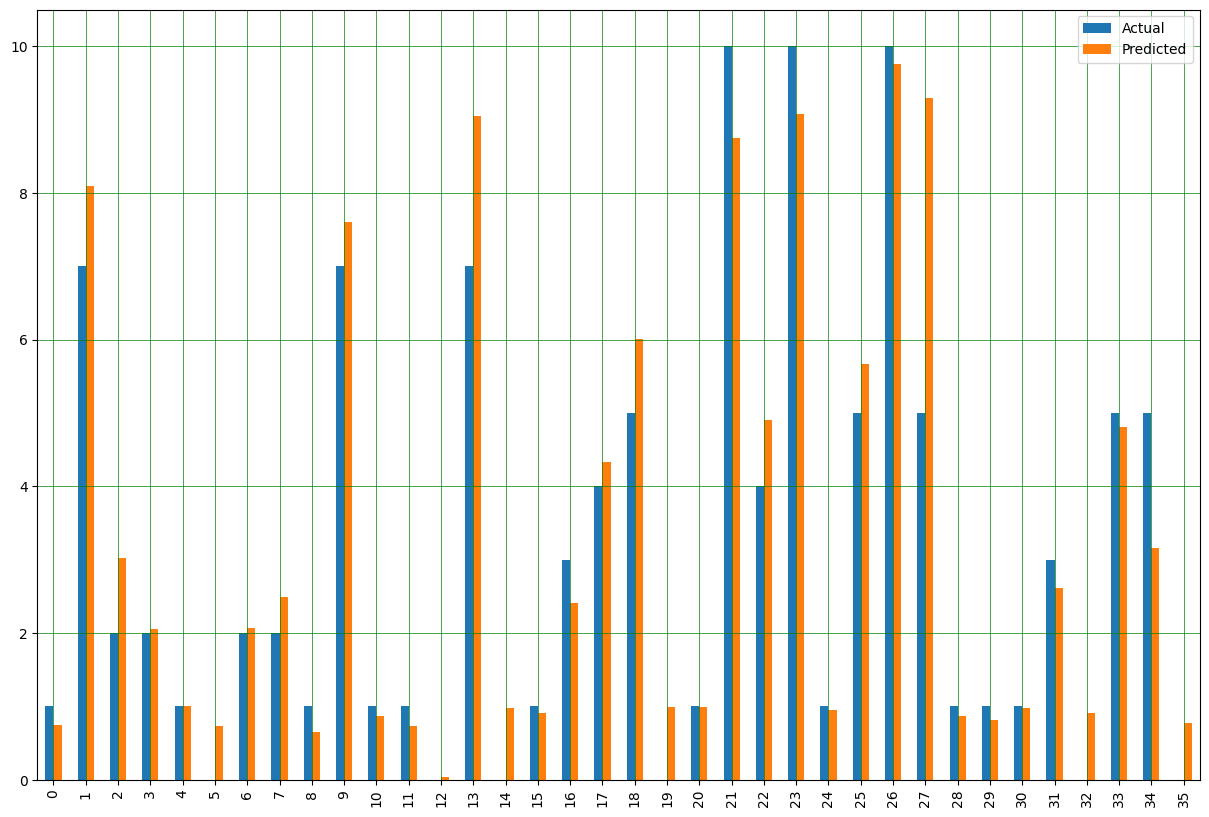

In [168]:
final.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

### C. Lakukan analisis cluster yang dapat terbentuk pada data karyawan. Deskripsikan karakteristik masing-masing cluster yang didapatkan! (Feature selection, clustering)   

Sebelum melakukan pemodelan clustering, ada beberapa langkah preprocessing dan feature selection yang kami lakukan terlebih dahulu. Langkah-langkah tersebut adalah

undefined. Mengubah nilai fitur division, major, dan role menjadi singkatan

undefined. Melakukan One-Hot Encoding untuk fitur-fitur yang kategorikal yang bernilai kata-kata, seperti resign, division, major, gender, role, marriage_status, dan over_time

undefined. Scaling data yang sudah di-encode menggunakan MinMaxScaler

undefined. Melakukan feature selection menggunakan metode PCA

In [169]:
cluster = cleaned.copy(deep=True)

In [170]:
cluster['division'] = cluster['division'].replace(['Health and Technology','Marketing','Human Resource'],['HnT','M','HR'])
cluster['major'] = cluster['major'].replace(['Life Sciences','Other','Computer Science','Marketing','Technical Degree','Human Resources'],['LS','O','CS','M','TD','HR'])
cluster['role'] = cluster['role'].replace(['Sales Executive','Research Scientist','Laboratory Technician','Manufacturing Director','Healthcare Representative','Manager','Sales Representative','Research Director','Human Resources'],['SE','RS','LT','MD','HCR','M','SR','RD','HR'])

In [171]:
display(cluster)

,age,resign,division,home_distance,education,score_environment,major,gender,hourly_rate,score_contribution,...,salary_increment_percentage,rate_performance,score_work_relationahip,time_total_working,last_year_training_time,score_work_life_balance,time_current_company,time_current_role,time_last_promotion,time_current_manager
0,41,Yes,M,1,2,2,LS,Female,94,3,...,11,3,1,8.0,3.0,1,6.0,4.0,0.0,5.0
1,49,No,HnT,8,1,3,LS,Male,61,2,...,23,4,4,10.0,3.0,3,10.0,7.0,1.0,7.0
2,37,Yes,HnT,2,2,4,O,Male,92,2,...,15,3,2,7.0,3.0,3,0.0,0.0,0.0,0.0
3,33,No,HnT,3,4,4,LS,Female,56,3,...,11,3,3,8.0,3.0,3,8.0,7.0,3.0,0.0
4,27,No,HnT,2,1,1,CS,Male,40,3,...,12,3,4,6.0,3.0,3,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,HnT,23,2,3,CS,Male,41,4,...,17,3,3,17.0,3.0,3,5.0,2.0,0.0,3.0
1466,39,No,HnT,6,1,4,CS,Male,42,2,...,15,3,1,9.0,3.0,3,7.0,7.0,1.0,7.0
1467,27,No,HnT,4,3,2,LS,Male,87,4,...,20,4,2,6.0,3.0,3,6.0,2.0,0.0,3.0
1468,49,No,M,2,3,4,CS,Male,63,2,...,14,3,4,17.0,3.0,2,9.0,6.0,0.0,8.0


In [172]:
cluster2 = pd.get_dummies(cluster)

In [173]:
display(cluster2)

,age,home_distance,education,score_environment,hourly_rate,score_contribution,job_rank,score_job_satisfication,monthly_income,companies_count,...,role_MD,role_RD,role_RS,role_SE,role_SR,marriage_status_Divorced,marriage_status_Married,marriage_status_Single,over_time_No,over_time_Yes
0,41,1,2,2,94,3,2,4,5993.0,8.0,...,0,0,0,1,0,0,0,1,0,1
1,49,8,1,3,61,2,2,2,5130.0,1.0,...,0,0,1,0,0,0,1,0,1,0
2,37,2,2,4,92,2,1,3,2090.0,6.0,...,0,0,0,0,0,0,0,1,0,1
3,33,3,4,4,56,3,1,3,2909.0,1.0,...,0,0,1,0,0,0,1,0,0,1
4,27,2,1,1,40,3,1,2,3468.0,2.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,3,41,4,2,4,2571.0,4.0,...,0,0,0,0,0,0,1,0,1,0
1466,39,6,1,4,42,2,3,1,9991.0,4.0,...,0,0,0,0,0,0,1,0,1,0
1467,27,4,3,2,87,4,2,2,6142.0,1.0,...,1,0,0,0,0,0,1,0,0,1
1468,49,2,3,4,63,2,2,2,5390.0,2.0,...,0,0,0,1,0,0,1,0,1,0


In [174]:
scaler = MinMaxScaler()
cluster_sc = scaler.fit_transform(cluster2)

Pada tahap feature selection ini, kami memilih menggunakan metode PCA karena terdapat banyak fitur pada dataset. Kami ingin memanfaatkan semua fitur yang ada tanpa harus mengurangi fitur-fitur pada dataset. Pada tahap ini, kami ingin mengekstrak dari 47 fitur menjadi dua fitur dari data yang sudah di-scale. Pemilihan jumlah dua fitur dilakukan agar memudahkan visualisasi saat di-plot menggunakan scatterplot. 

In [175]:
pca = PCA(n_components=2)

In [176]:
pca.fit(cluster_sc)
pca_data = pca.transform(cluster_sc)

Berikut adalah nilai explained variance dari principal component yang pertama dan kedua menggunakan Scree Plot.

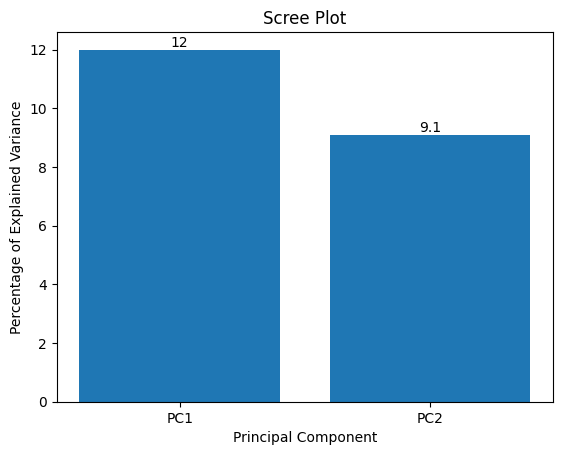

In [177]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
ax = plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.bar_label(ax, label_type='edge')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Setelah didapatkan hasil fit dari model PCA, kami melakukan plot terhadap persebaran datanya. Dari hasil plot di bawah, PCA sudah bisa menghasilkan kumpulan cluster-cluster yang bisa dilihat secara kasat mata meskipun belum dilakukan modeling. Yang dapat disimpulkan bahwa hasil PCA sudah cukup baik.

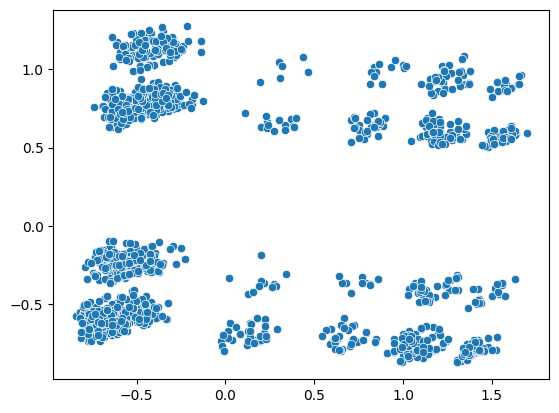

In [178]:
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1],data=pca_data)
plt.show()

Langkah selanjutnya adalah melakukan pemodelan clustering. Model yang kami pilih untuk clustering adalah K-Means. Akan tetapi, sebelum benar-benar melakukan pemodelan clustering. Kami ingin mencari k yang optimal agar bisa menghasilkan clustering yang baik terlebih dahulu. Hal tersebut kami lakukan menggunakan silhouette_score. Berdasarkan hasil di bawah, k dengan nilai 4 menghasilkan silhouette_score yang terbaik, yaitu 0.74.

In [179]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_cluster in range_n_clusters:
  clusterer = KMeans(n_clusters=n_cluster)
  cluster_labels = clusterer.fit_predict(pca_data)

  silhouette_avg = silhouette_score(pca_data, cluster_labels)

  print(
        "For n_clusters =",
        n_cluster,
        ", The average silhouette_score is:",
        silhouette_avg,
    )

For n_clusters = 2 , The average silhouette_score is: 0.5472659862449308
For n_clusters = 3 , The average silhouette_score is: 0.6708857511528432
For n_clusters = 4 , The average silhouette_score is: 0.7430877810032787
For n_clusters = 5 , The average silhouette_score is: 0.7113553675561334
For n_clusters = 6 , The average silhouette_score is: 0.6843450771127938
For n_clusters = 7 , The average silhouette_score is: 0.613018393810164
For n_clusters = 8 , The average silhouette_score is: 0.5865137801754117
For n_clusters = 9 , The average silhouette_score is: 0.5386893521659373
For n_clusters = 10 , The average silhouette_score is: 0.5289927625346059


Setelah mendapat k yang optimal yang bernilai 4, kami melakukan pemodelan clustering menggunakan K-Means dengan paramater cluster sebanyak 4.

In [180]:
km = KMeans(n_clusters=4, random_state=0)
df_km = km.fit_predict(pca_data)
centroids = km.cluster_centers_

Berikut adalah hasil clustering apabila dilihat dari scatterplot yang dihasilkan oleh data setelah PCA. Dapat terlihat juga, hasil clustering yang dihasilkan oleh K-Means dengan k bernilai 4 sudah baik.

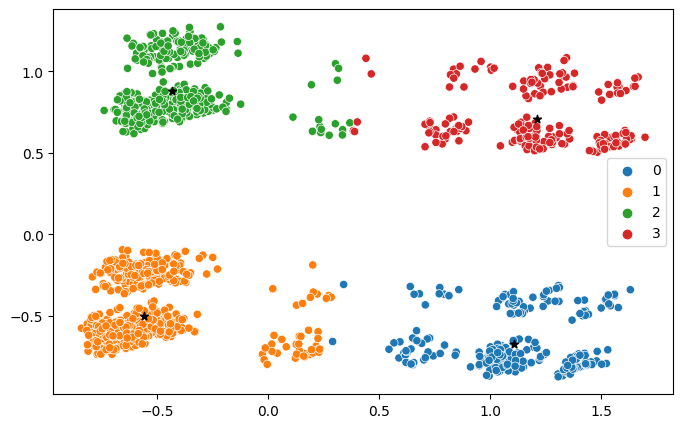

In [181]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=pca_data, hue=df_km, x=pca_data[:,0], y=pca_data[:,1], palette='tab10')
plt.scatter(centroids[:,0], centroids[:,1], marker="*", color="black")
plt.show()

Setelah melakukan pemodelan clustering, hasil clustering yang sudah didapat kami masukan ke dataset untuk melihat karakteristik yang dimiiki tiap cluster. Selain itu, kami juga memasukkan fitur age_group yang dihasilkan pada EDA untuk membantu melakukan penelusuran karakteristik tiap cluster.

In [182]:
clustered = cleaned.copy(deep=True)

In [183]:
clustered.insert(0,'cluster',df_km)
clustered.insert(2,'age_group',cleaned3['age_group'])

In [184]:
display(clustered)

,cluster,age,age_group,resign,division,home_distance,education,score_environment,major,gender,...,salary_increment_percentage,rate_performance,score_work_relationahip,time_total_working,last_year_training_time,score_work_life_balance,time_current_company,time_current_role,time_last_promotion,time_current_manager
0,3,41,38-47,Yes,Marketing,1,2,2,Life Sciences,Female,...,11,3,1,8.0,3.0,1,6.0,4.0,0.0,5.0
1,1,49,48-60,No,Health and Technology,8,1,3,Life Sciences,Male,...,23,4,4,10.0,3.0,3,10.0,7.0,1.0,7.0
2,1,37,28-37,Yes,Health and Technology,2,2,4,Other,Male,...,15,3,2,7.0,3.0,3,0.0,0.0,0.0,0.0
3,2,33,28-37,No,Health and Technology,3,4,4,Life Sciences,Female,...,11,3,3,8.0,3.0,3,8.0,7.0,3.0,0.0
4,1,27,18-27,No,Health and Technology,2,1,1,Computer Science,Male,...,12,3,4,6.0,3.0,3,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,36,28-37,No,Health and Technology,23,2,3,Computer Science,Male,...,17,3,3,17.0,3.0,3,5.0,2.0,0.0,3.0
1466,1,39,38-47,No,Health and Technology,6,1,4,Computer Science,Male,...,15,3,1,9.0,3.0,3,7.0,7.0,1.0,7.0
1467,1,27,18-27,No,Health and Technology,4,3,2,Life Sciences,Male,...,20,4,2,6.0,3.0,3,6.0,2.0,0.0,3.0
1468,0,49,48-60,No,Marketing,2,3,4,Computer Science,Male,...,14,3,4,17.0,3.0,2,9.0,6.0,0.0,8.0


Berikut adalah persebaran jumlah data tiap cluster pada dataset.

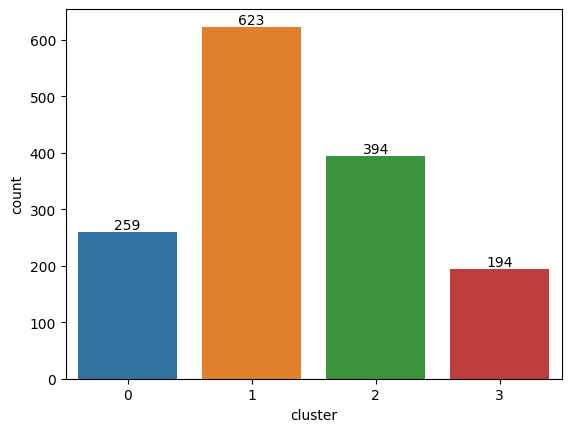

In [185]:
ax = sns.countplot(x=clustered['cluster'])
plt.bar_label(ax.containers[0])
plt.show()

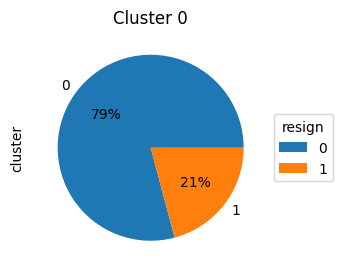

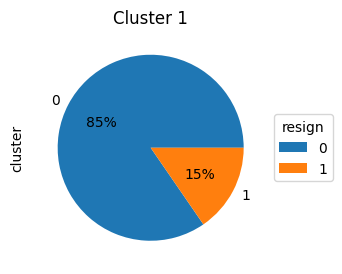

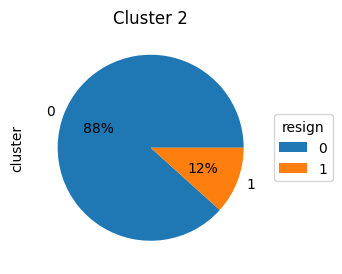

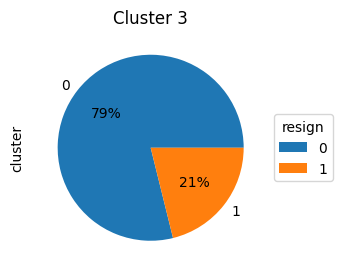

In [186]:
# mau make pie chart
cluster_list = [0, 1, 2, 3]

for i in cluster_list:
    show_plot_cluster('cluster', i, "Cluster", 'resign')


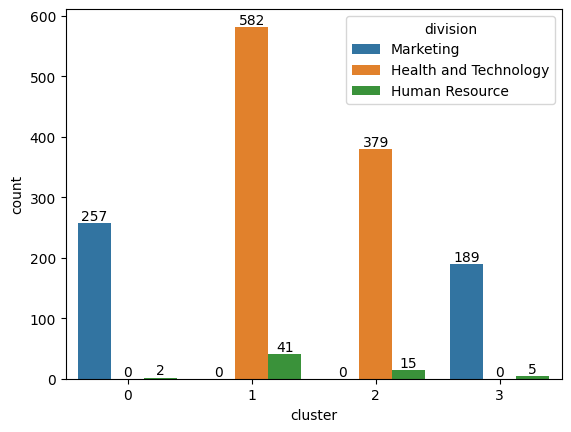

In [187]:
ax = sns.countplot(x=clustered['cluster'], hue=clustered['division'])
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.bar_label(ax.containers[2])
plt.show()

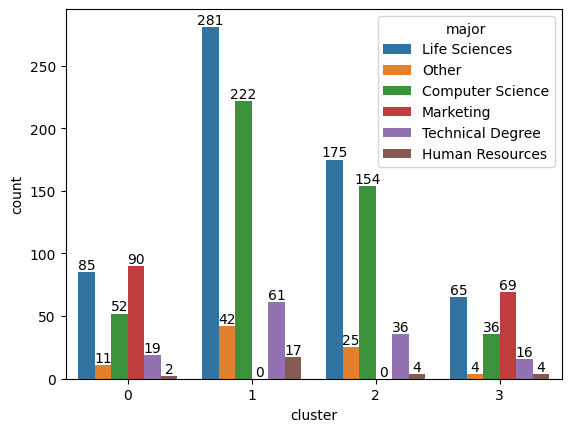

In [188]:
ax = sns.countplot(x=clustered['cluster'], hue=clustered['major'])
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.bar_label(ax.containers[2])
plt.bar_label(ax.containers[3])
plt.bar_label(ax.containers[4])
plt.bar_label(ax.containers[5])
plt.show()

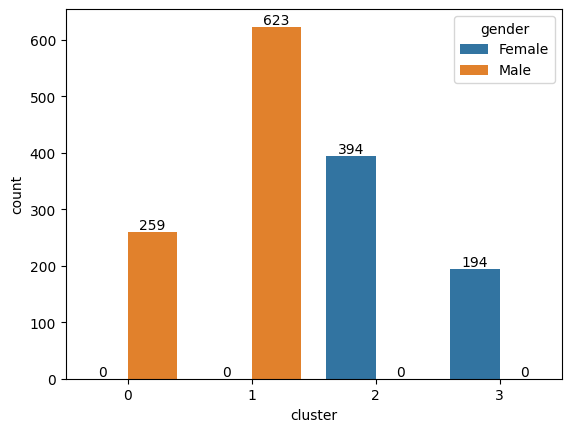

In [189]:
ax = sns.countplot(x=clustered['cluster'], hue=clustered['gender'])
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.show()

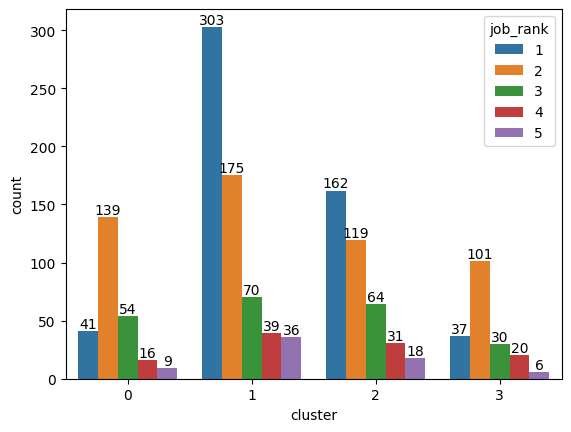

In [190]:
ax = sns.countplot(x=clustered['cluster'], hue=clustered['job_rank'])
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.bar_label(ax.containers[2])
plt.bar_label(ax.containers[3])
plt.bar_label(ax.containers[4])
plt.show()

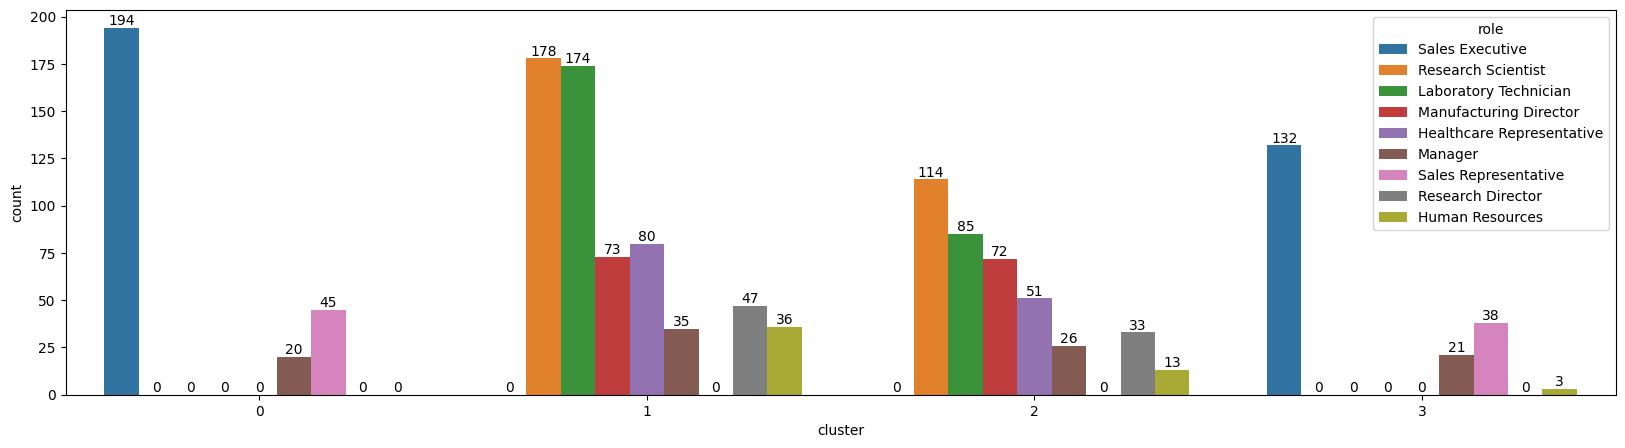

In [191]:
plt.figure(figsize =(20,5))
ax = sns.countplot(x=clustered['cluster'], hue=clustered['role'])
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.bar_label(ax.containers[2])
plt.bar_label(ax.containers[3])
plt.bar_label(ax.containers[4])
plt.bar_label(ax.containers[5])
plt.bar_label(ax.containers[6])
plt.bar_label(ax.containers[7])
plt.bar_label(ax.containers[8])
plt.show()

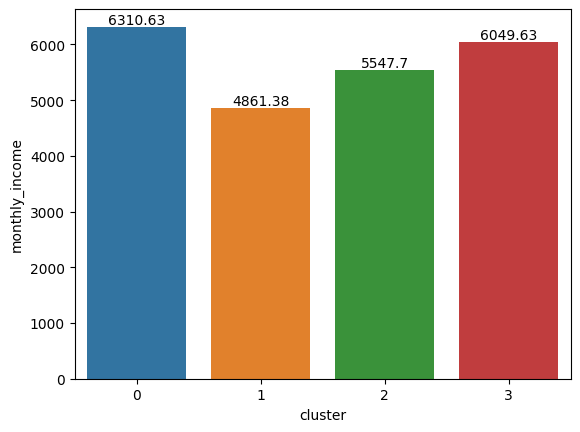

In [192]:
ax = sns.barplot(x=clustered['cluster'], y=clustered['monthly_income'], errorbar=('ci', False))
plt.bar_label(ax.containers[0])
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c8db6615-7e50-4b1c-9bd7-2d9367b7e609' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>